# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Analysis](#3.5_Analysis)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, I have a firm idea of what your data science problem is and have the data that could help solve it. The business problem is to predict energy production and consumption. The data I have conslidated from multiple csv files in data wrangling part has continent, country, year and energy, it also has missing values that will be taken care in EDA. Data is from 1981 to 2021 for various energy types Coal, Nuclear, Pertroleum, and Netural Gas. I will explore data for different continenets, countires for all energy types production and consumption patterns and prepare data for modeling.


## 3.3 Imports<a id='3.3_Imports'></a>

In [92]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Energy data<a id='3.4.1_Energy_data'></a>

In [93]:
energy_df = pd.read_csv('../Data_Files/Final_data.csv')

In [94]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77280 entries, 0 to 77279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77280 non-null  int64  
 1   Continent   77280 non-null  object 
 2   Country     77280 non-null  object 
 3   Year        77280 non-null  object 
 4   Energy      71872 non-null  float64
 5   Usage       77280 non-null  object 
 6   Source      77280 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


There are missing values in the energy column.

In [95]:
energy_df.describe()

Unnamed: 0        Energy
count  77280.000000  71872.000000
mean   38639.500000      0.506059
std    22308.958739      2.829844
min        0.000000     -0.168214
25%    19319.750000      0.000000
50%    38639.500000      0.001524
75%    57959.250000      0.093661
max    77279.000000     96.197752

In [96]:
energy_df['Year'] = energy_df[['Year']].apply(pd.to_datetime)
energy_df.dtypes

Unnamed: 0             int64
Continent             object
Country               object
Year          datetime64[ns]
Energy               float64
Usage                 object
Source                object
dtype: object

In [97]:
energy_df.head()

Unnamed: 0       Continent    Country       Year    Energy       Usage  \
0           0          Africa    Algeria 1980-01-01  0.002576  Production   
1       67691  Asia & Oceania  Hong Kong 1980-01-01  0.000000  Production   
2       67692  Asia & Oceania      India 1980-01-01  0.058701  Production   
3       67693  Asia & Oceania  Indonesia 1980-01-01  0.719400  Production   
4       67694  Asia & Oceania      Japan 1980-01-01  0.085878  Production   

       Source  
0    Neuclear  
1  NaturalGas  
2  NaturalGas  
3  NaturalGas  
4  NaturalGas

There is additional index column added to dataframe. Which can be dropped.

In [98]:
energy_df = energy_df.drop(['Unnamed: 0'], axis=1)
energy_df.head()

Continent    Country       Year    Energy       Usage      Source
0          Africa    Algeria 1980-01-01  0.002576  Production    Neuclear
1  Asia & Oceania  Hong Kong 1980-01-01  0.000000  Production  NaturalGas
2  Asia & Oceania      India 1980-01-01  0.058701  Production  NaturalGas
3  Asia & Oceania  Indonesia 1980-01-01  0.719400  Production  NaturalGas
4  Asia & Oceania      Japan 1980-01-01  0.085878  Production  NaturalGas

In [99]:
# In source 'Neuclear' is spelled wrong, replace it with 'Nuclear'
energy_df['Source'].replace('Neuclear', 'Nuclear', inplace=True)
energy_df.head()

Continent    Country       Year    Energy       Usage      Source
0          Africa    Algeria 1980-01-01  0.002576  Production     Nuclear
1  Asia & Oceania  Hong Kong 1980-01-01  0.000000  Production  NaturalGas
2  Asia & Oceania      India 1980-01-01  0.058701  Production  NaturalGas
3  Asia & Oceania  Indonesia 1980-01-01  0.719400  Production  NaturalGas
4  Asia & Oceania      Japan 1980-01-01  0.085878  Production  NaturalGas

In [100]:
energy_df.shape

(77280, 6)

In [101]:
energy_df.isnull().sum()

Continent       0
Country         0
Year            0
Energy       5408
Usage           0
Source          0
dtype: int64

In [102]:
energy_df.Year.unique()

array(['1980-01-01T00:00:00.000000000', '1981-01-01T00:00:00.000000000',
       '1982-01-01T00:00:00.000000000', '1983-01-01T00:00:00.000000000',
       '1984-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1986-01-01T00:00:00.000000000', '1987-01-01T00:00:00.000000000',
       '1988-01-01T00:00:00.000000000', '1989-01-01T00:00:00.000000000',
       '1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01

Data includes 42 years of history, 1980 to 2021.

##### Checking time series gap

In [103]:
# Sorting dataframe by Year column
energy_df = energy_df.sort_values(by=['Year'])
energy_df.dtypes

Continent            object
Country              object
Year         datetime64[ns]
Energy              float64
Usage                object
Source               object
dtype: object

In [104]:
# Set year as index of dataframe
energy_df = energy_df.set_index('Year')

In [105]:
energy_df['time_diff'] = energy_df.index.to_series().diff()


In [106]:
# Set a threshold for time gaps
time_gap_threshold = pd.Timedelta(days=1)

In [107]:
# Find rows with time gaps exceeding the threshold
time_gap_rows = energy_df[energy_df['time_diff'] > time_gap_threshold]

#print(energy_df)
print("\nRows with time gaps:")
print(time_gap_rows)


Rows with time gaps:
                          Continent                   Country    Energy  \
Year                                                                      
1981-01-01                  Eurasia                Kyrgyzstan       NaN   
1982-01-01  Central & South America                  Paraguay  0.007944   
1983-01-01  Central & South America                   Uruguay  0.000000   
1984-01-01                   Africa         Equatorial Guinea  0.000000   
1985-01-01                   Africa                  Cameroon  0.000000   
1986-01-01                  Eurasia                   Belarus       NaN   
1987-01-01                   Africa                Cabo Verde  0.000000   
1988-01-01                   Africa                Cabo Verde  0.000000   
1989-01-01                  Eurasia                Azerbaijan       NaN   
1990-01-01                   Africa               South Sudan       NaN   
1991-01-01                   Africa  Central African Republic  0.000000   
199

I have yearly data, time gaps series shows 366 and 365 days, means there is no time gap.

In [108]:
energy_df = energy_df.drop(['time_diff'], axis=1)
energy_df.head()

Continent         Country    Energy        Usage   Source
Year                                                                
1980-01-01    Africa         Algeria  0.002576   Production  Nuclear
1980-01-01   Eurasia         Belarus       NaN  Consumption     Coal
1980-01-01   Eurasia         Armenia       NaN  Consumption     Coal
1980-01-01    Europe         Iceland  0.000336  Consumption     Coal
1980-01-01    Europe  United Kingdom  3.154354  Consumption     Coal

#### Checking null values in other columns

In [109]:
null_df = energy_df[energy_df["Energy"].isnull()]
null_df['Source'].value_counts()

NaturalGas    1402
Petrolium     1362
Coal          1322
Nuclear       1322
Name: Source, dtype: int64

In [110]:
null_df[['Continent', 'Country']].value_counts()

Continent                Country                     
Asia & Oceania           Hawaiian Trade Zone             280
Africa                   South Sudan                     256
Europe                   Germany, West                   248
                         Germany, East                   248
Eurasia                  Former U.S.S.R.                 240
Europe                   Former Yugoslavia               240
                         Former Czechoslovakia           232
                         Kosovo                          224
                         Former Serbia and Montenegro    224
                         Serbia                          208
                         Montenegro                      208
Asia & Oceania           Timor-Leste                     184
Middle East              Palestinian Territories         136
Africa                   Eritrea                         112
Europe                   Slovakia                        104
                         Czechi

In [111]:
null_df['Continent'].value_counts()

Europe                     2800
Eurasia                    1392
Africa                      478
Asia & Oceania              466
Central & South America     136
Middle East                 136
Name: Continent, dtype: int64

In [112]:
null_df['Usage'].value_counts()

Consumption    2724
Production     2684
Name: Usage, dtype: int64

There are 5408 missing values in the Energy column. Missing values proportion for production and consumption is similar. Also, almost similar proportion of missing values for each energy type. Most of the countries with missing values belong to Europe and Eurasia. To make furture analysis, I will drop rows with missing values.

### 3.4.2 Ploting Production by country <a id='3.4.2_Ploting_Production_by_country'></a>

EDA guiding questions:
1. How energy trends change over the time based on production and consumption?
2. How energy trends change over the time based on source production and consumption? Which soure is producing more energy and which source energy is getting more consumed. Plot based on continent.
3. Which county is producing which source of energy more?
4. Which county is consuming which source of energy more?

In [113]:
energy_df.head()

Continent         Country    Energy        Usage   Source
Year                                                                
1980-01-01    Africa         Algeria  0.002576   Production  Nuclear
1980-01-01   Eurasia         Belarus       NaN  Consumption     Coal
1980-01-01   Eurasia         Armenia       NaN  Consumption     Coal
1980-01-01    Europe         Iceland  0.000336  Consumption     Coal
1980-01-01    Europe  United Kingdom  3.154354  Consumption     Coal

In [114]:
minvalue = energy_df['Energy'].min() 
minvalue

-0.168213879

In [115]:
maxvalue = energy_df['Energy'].max() 
maxvalue

96.1977516

In [116]:
energy_df['Continent'].value_counts()

Africa                     19152
Asia & Oceania             16464
Europe                     15120
Central & South America    15120
Middle East                 4704
Eurasia                     4368
North America               2352
Name: Continent, dtype: int64

In [117]:
energy_df['Source'].value_counts()

Nuclear       19320
Coal          19320
Petrolium     19320
NaturalGas    19320
Name: Source, dtype: int64

In [118]:
Continents = ["Africa", "Asia & Oceania", "Europe", "Central & South America", "Middle East", "Eurasia", "North Anerica"]
energy_Use = ["Production", "Consumption"]
energy_type = ["Nuclear", "Coal", "Petrolium", "NaturalGas"]

## Analysis for each continent

### Africa Analysis

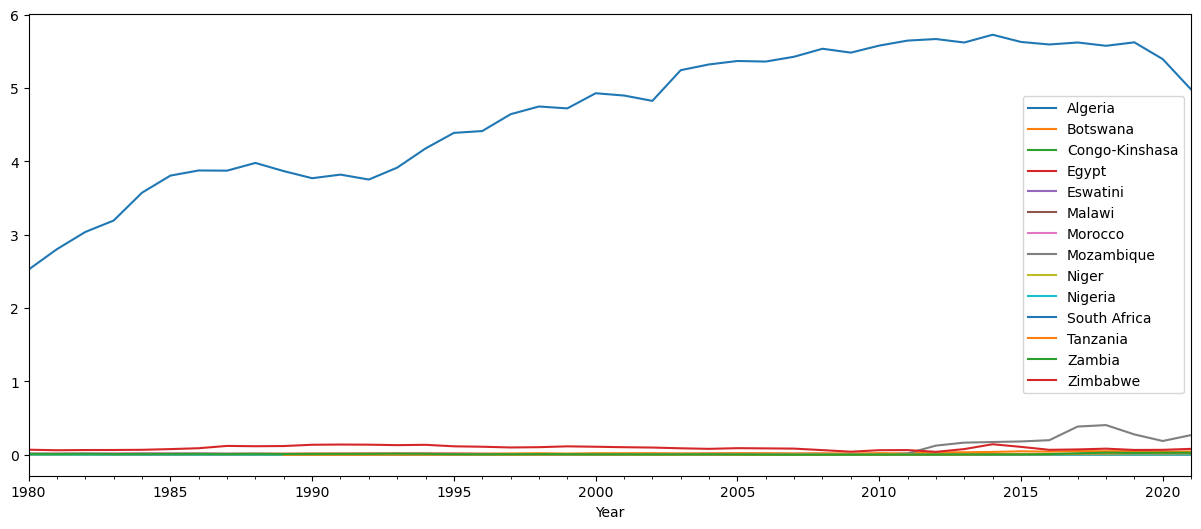

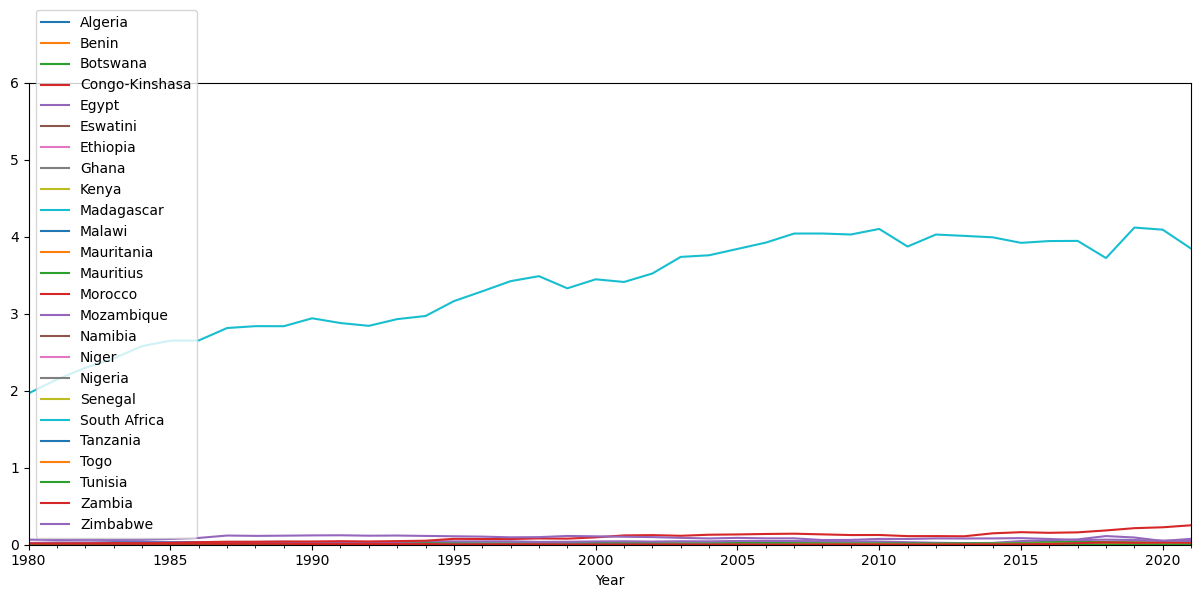

In [124]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Africa"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Africa"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,6))
plt.show()

In Africa, energy from coal prodcution and consumption trends are same. South africa, energy prodcution and consumption both high and has been increasing over the years.

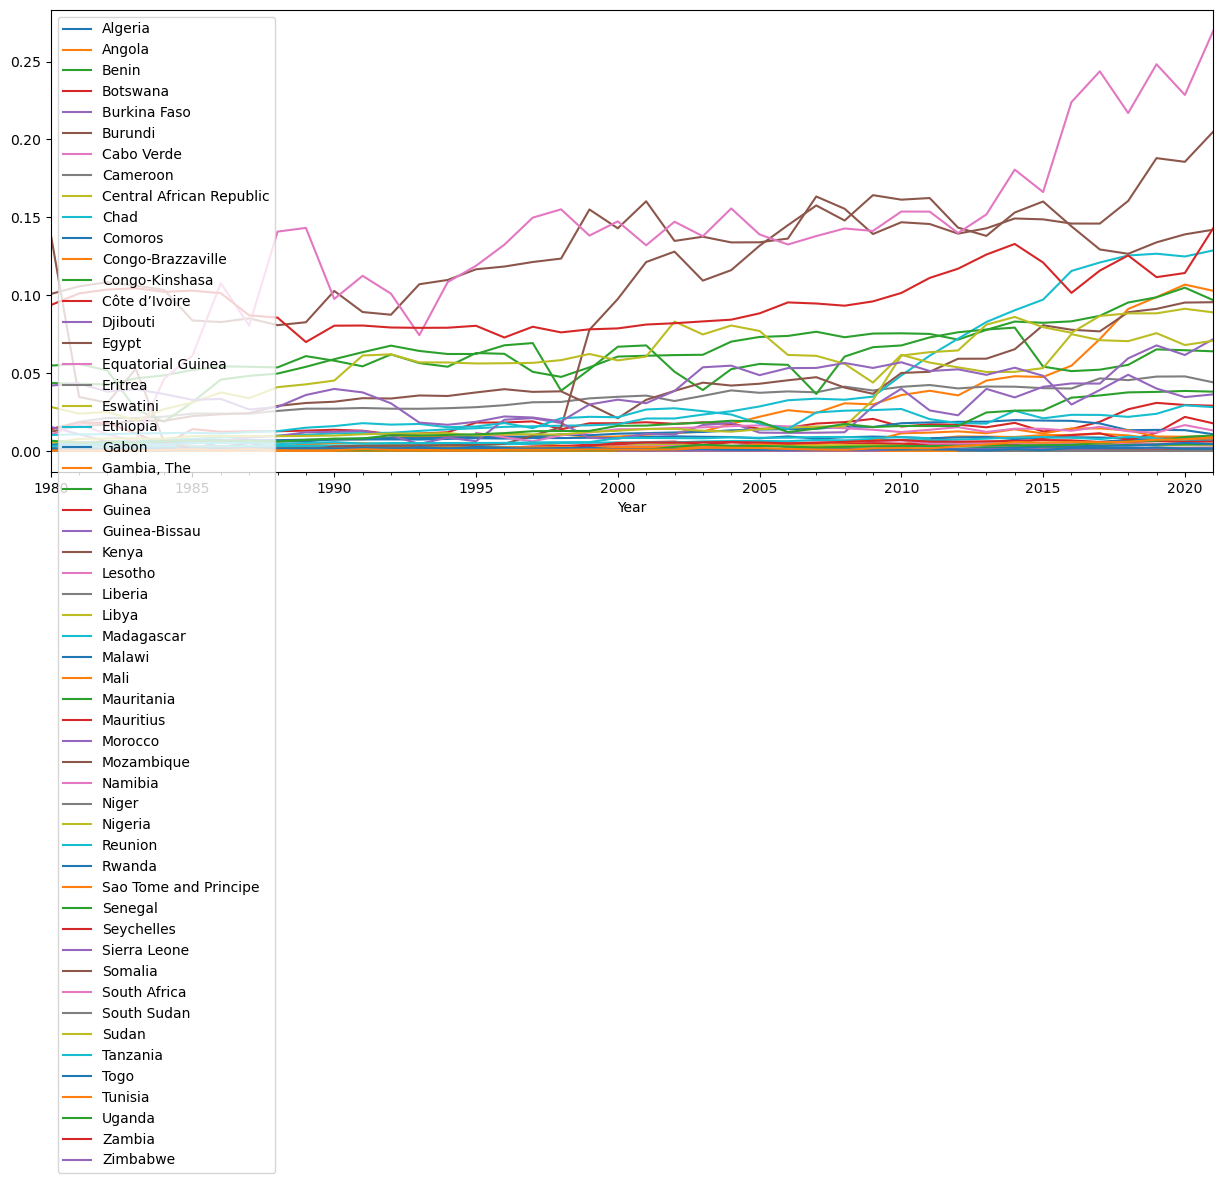

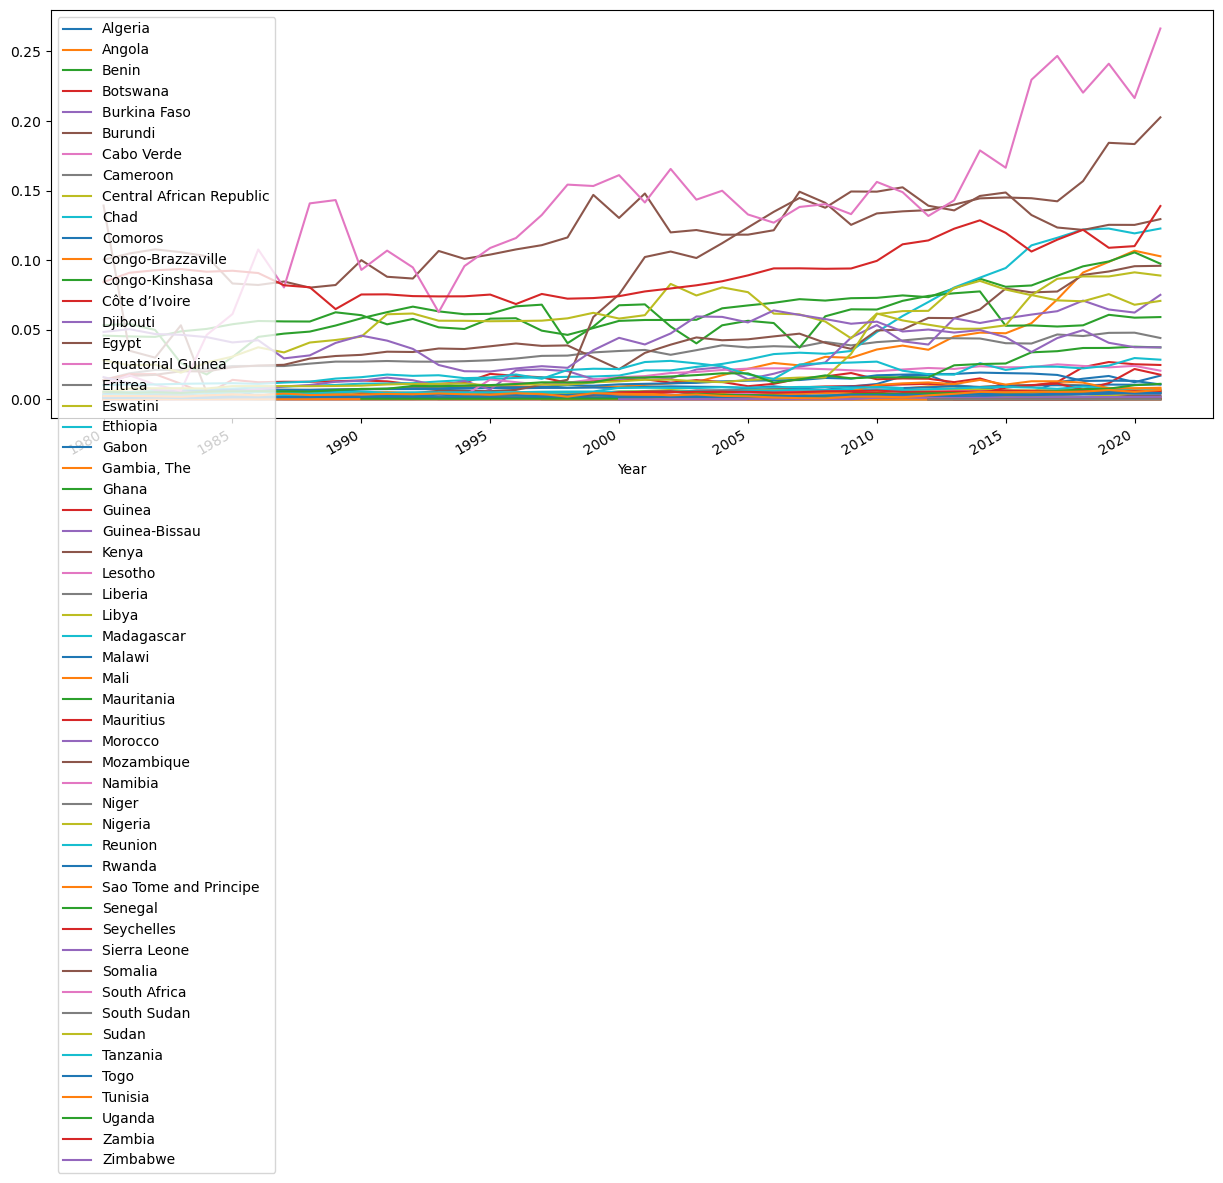

In [122]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Africa"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Africa"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))

plt.show()

Nuclear enery production and consumption trends are similar, all the countries are showing slow growing trend of prodcuction and consumption. South Africa is highest nueclear energy prodcution and consumption country. Even though there is fluctuation but overall trend is increasing.

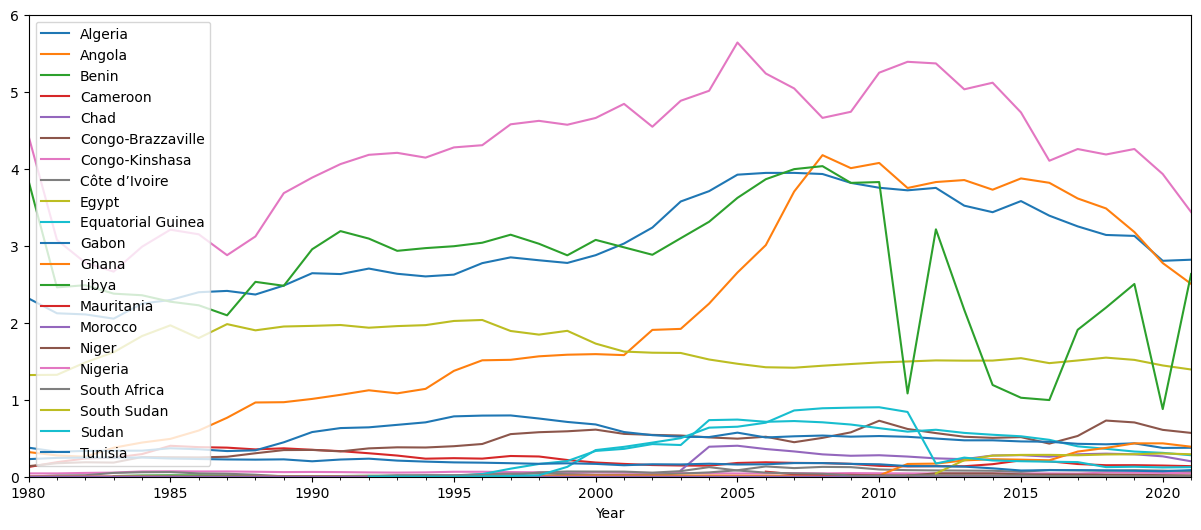

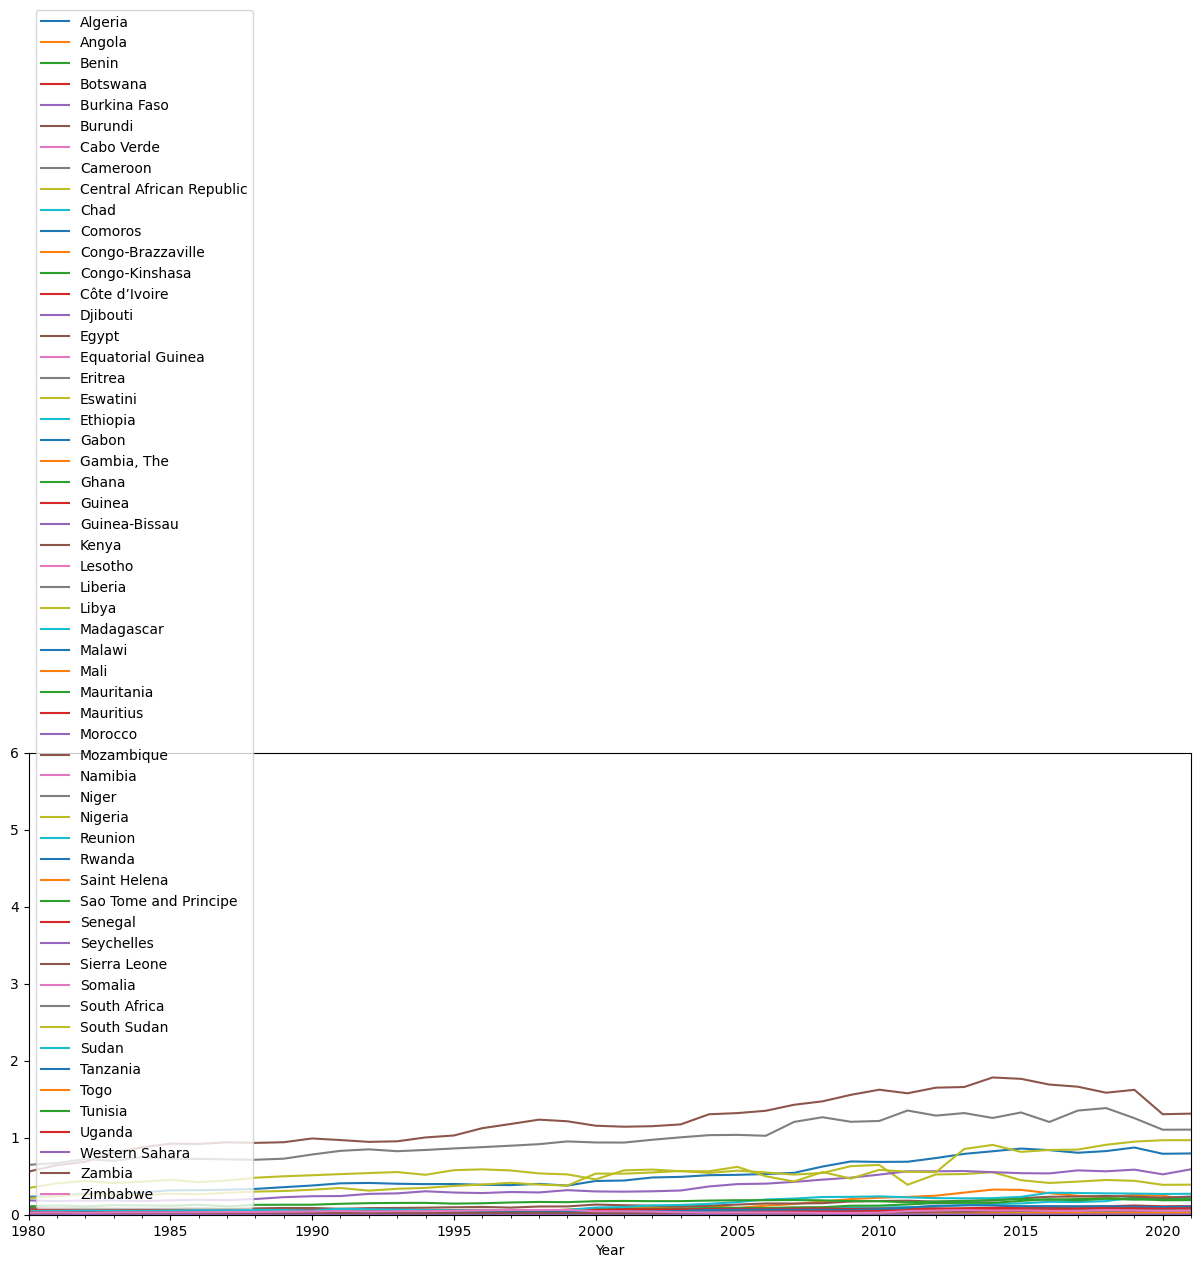

In [126]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Africa"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,6))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Africa"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,6))
plt.show()



Nigeria is highest Petrolium energy production country. There was dip from 1980 to 1985 and since then there is increase and there is deacrease started from 2015. Other countries Algeria, Ghana, Libya there is increasing trend and decrease starting form 2015.
Cons

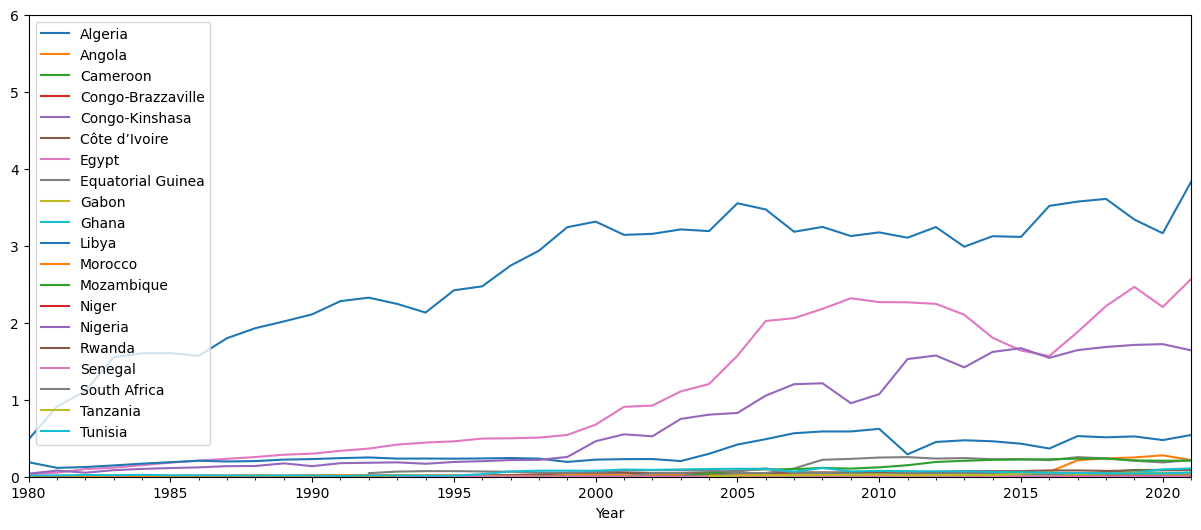

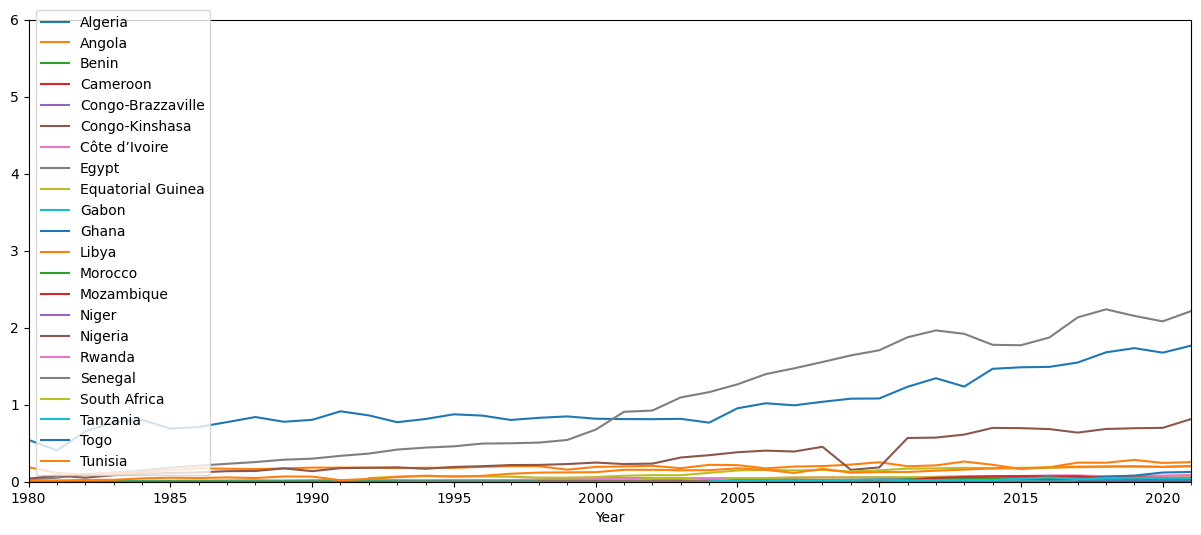

In [128]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Africa"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,6))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Africa"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,6))
plt.show()

Algeria is highest NaturalGas energy prodcution country. Algeria NaturalGas energy consumption trend stays same over the years, it started increasing slightly after 2005. Next country Nigeria production and consumption both increased after 2000.

### Asia & Oceania Analysis

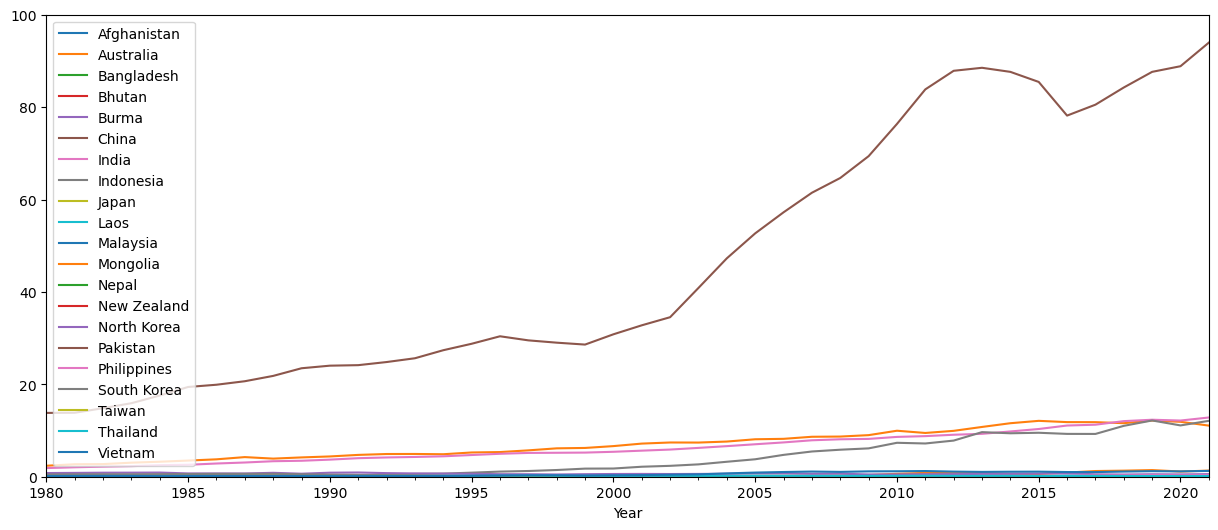

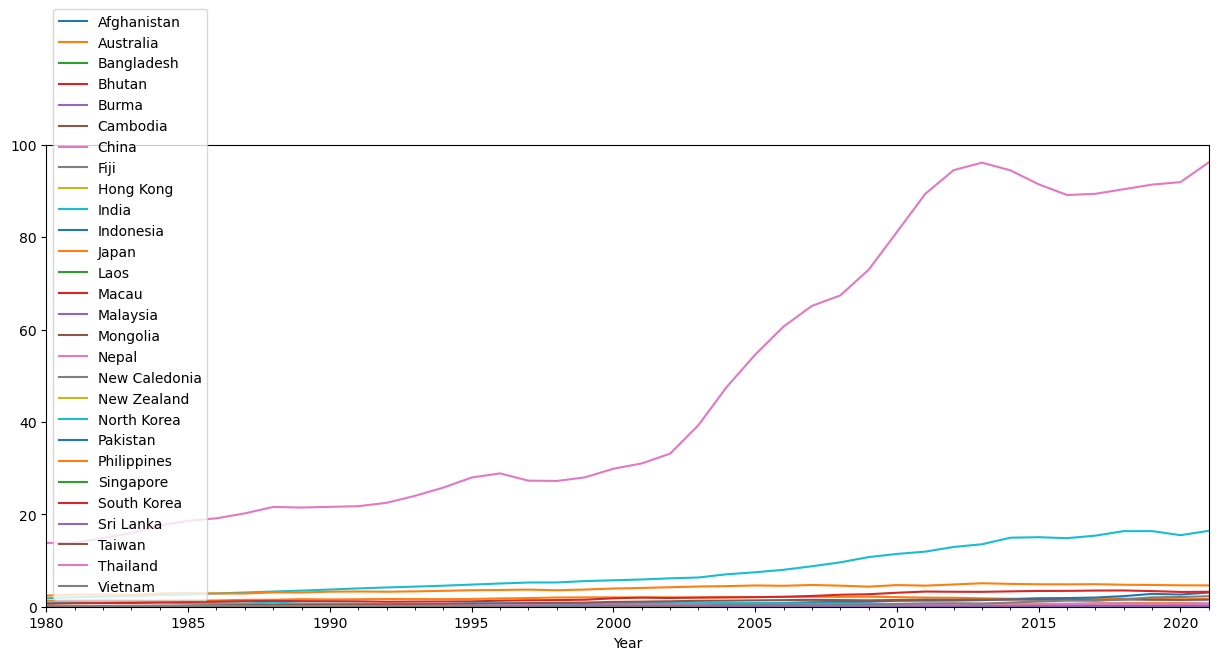

In [131]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Asia & Oceania"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,100))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Asia & Oceania"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,100))
plt.show()

China is highest Coal energy production and consumption country in Asia & Oceania continent.


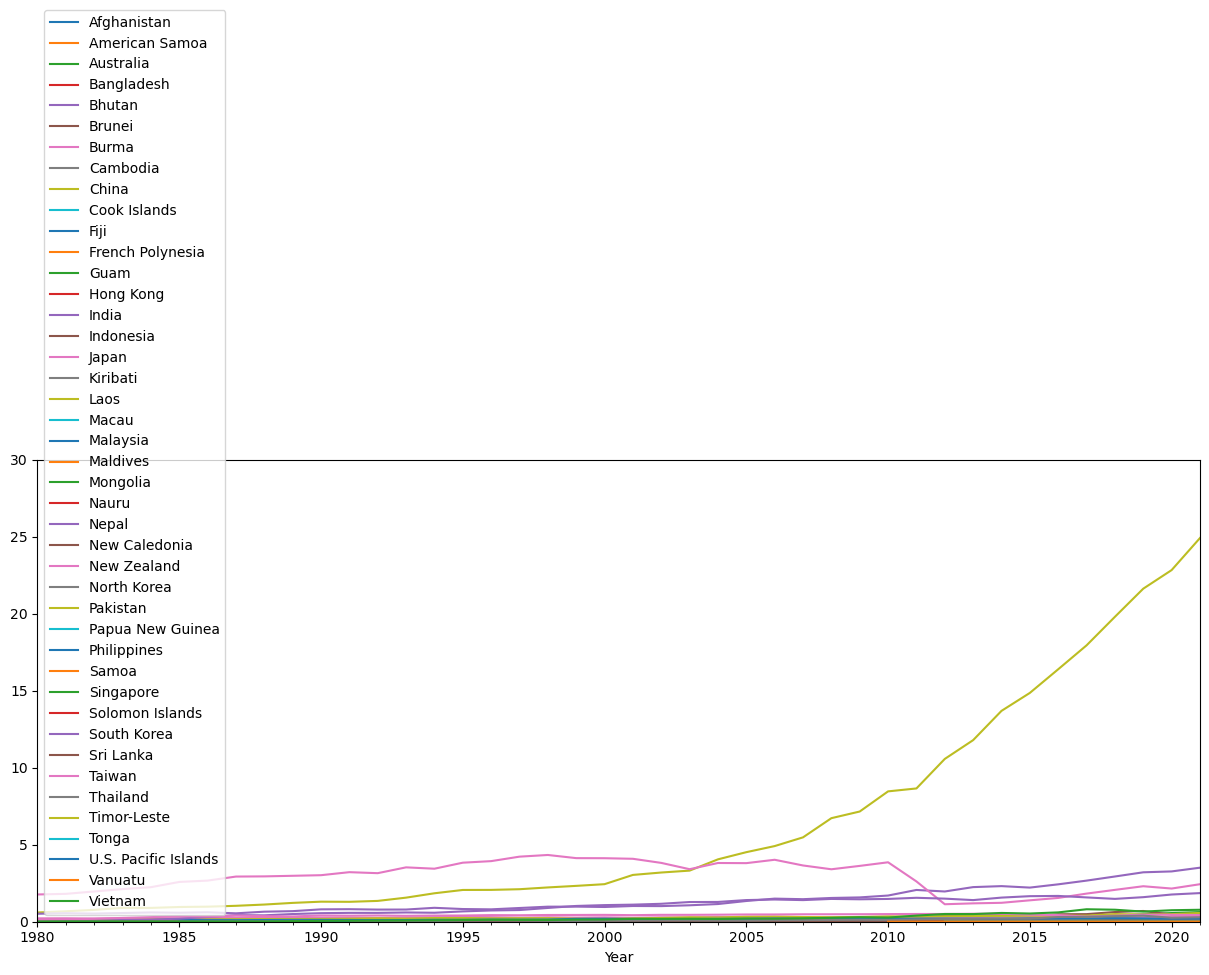

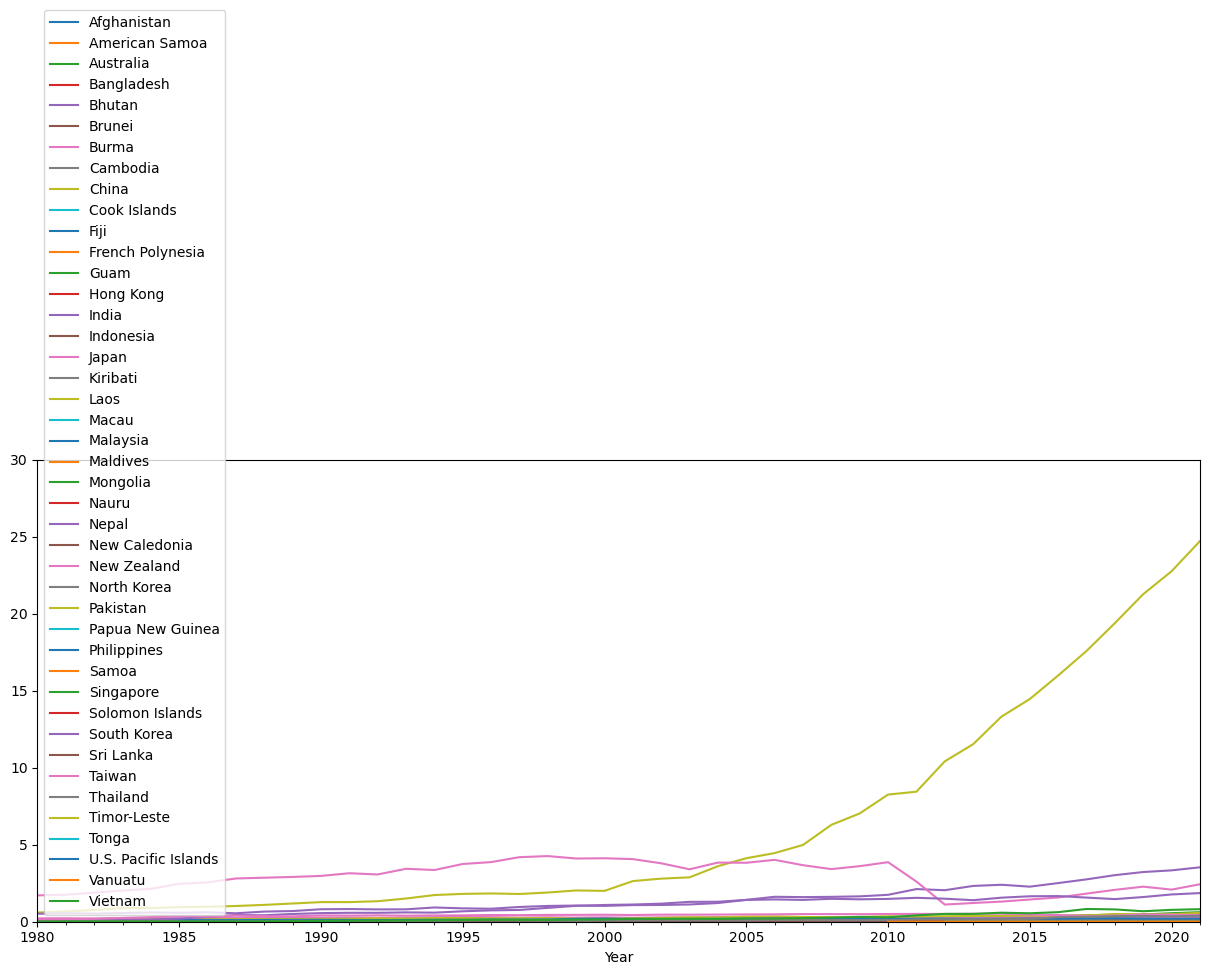

In [135]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Asia & Oceania"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,30))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Asia & Oceania"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,30))
plt.show()

China is highest Nuclear energy production and consumption country in Asia & Oceania continent.


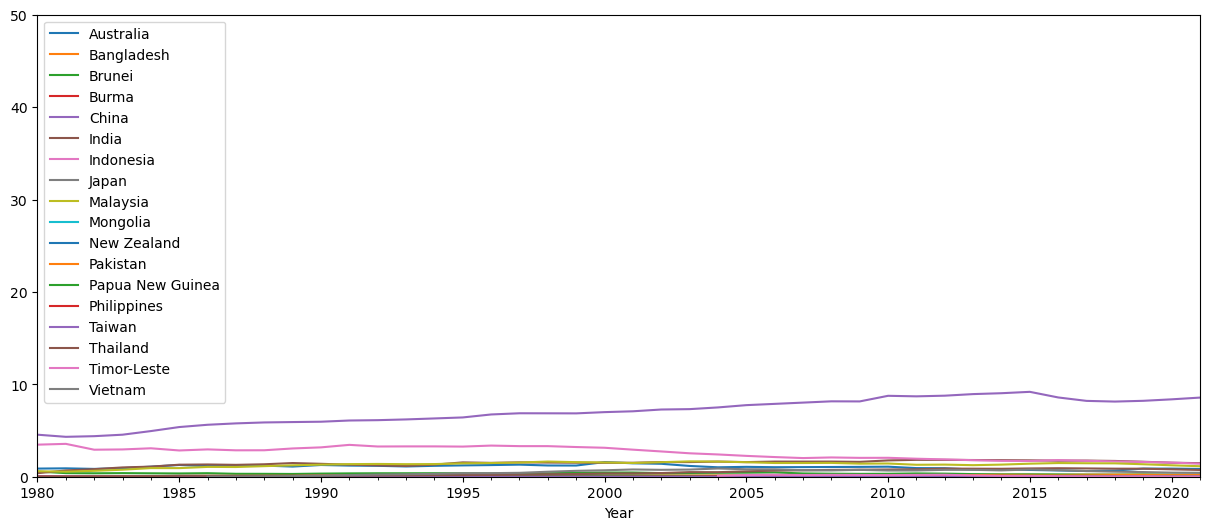

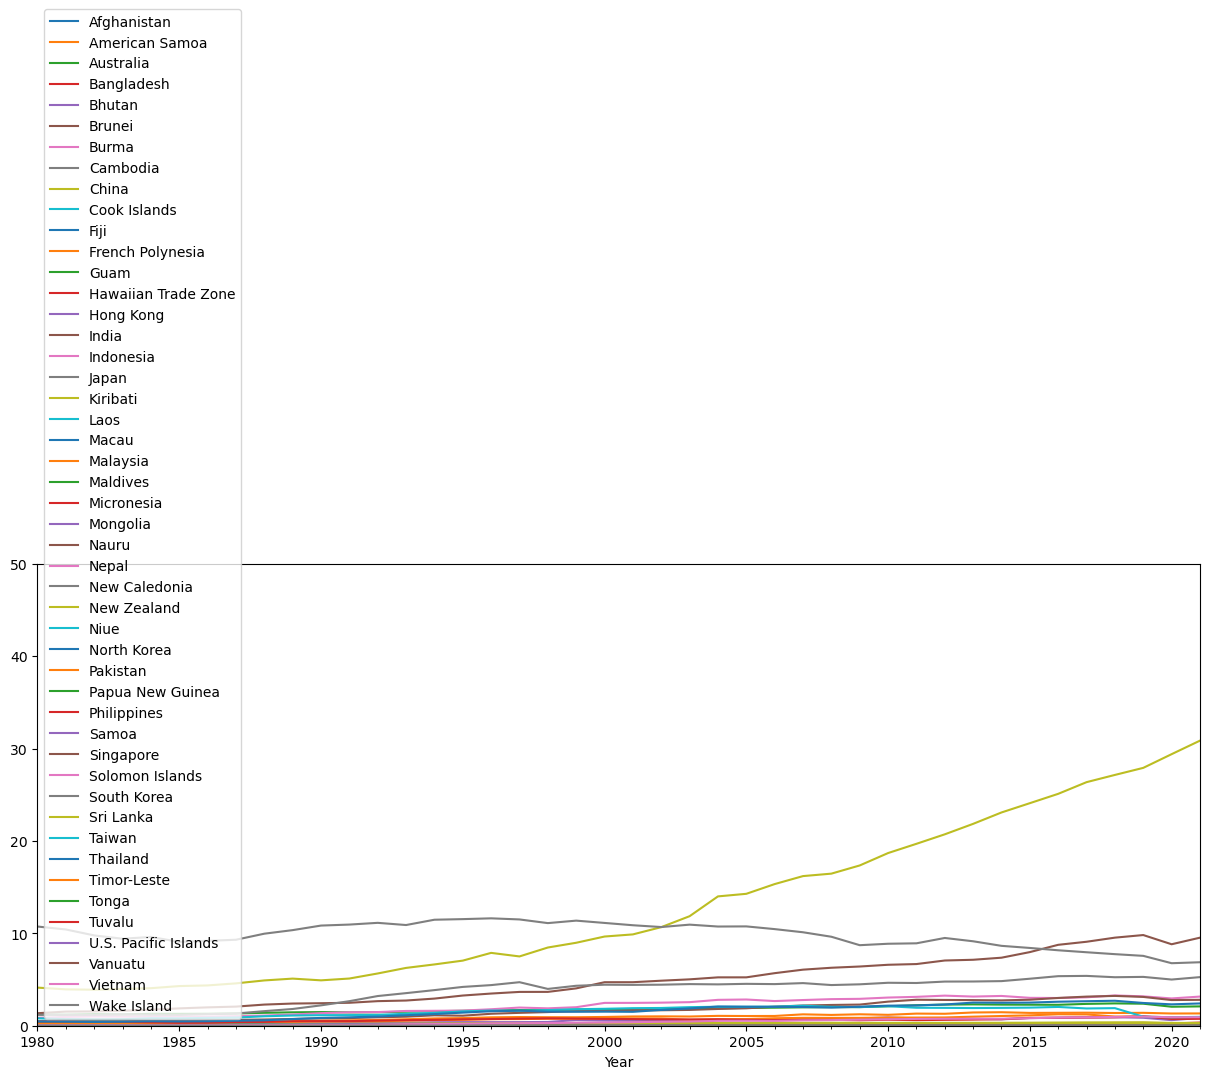

In [137]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Asia & Oceania"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,50))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Asia & Oceania"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,50))
plt.show()

China is highest Petrolium energy production and consumption country in Asia & Oceania continent.


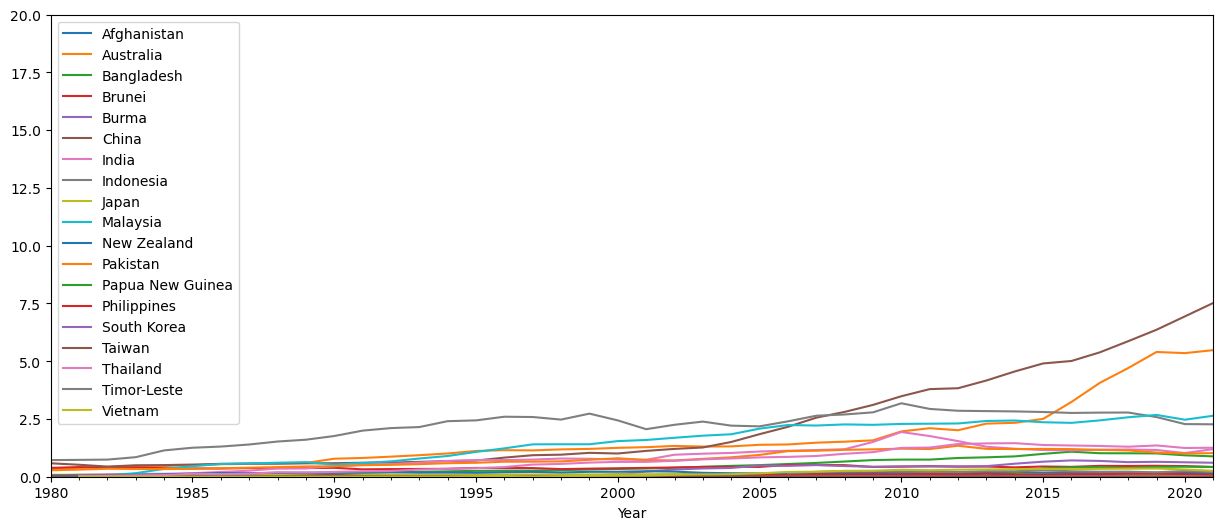

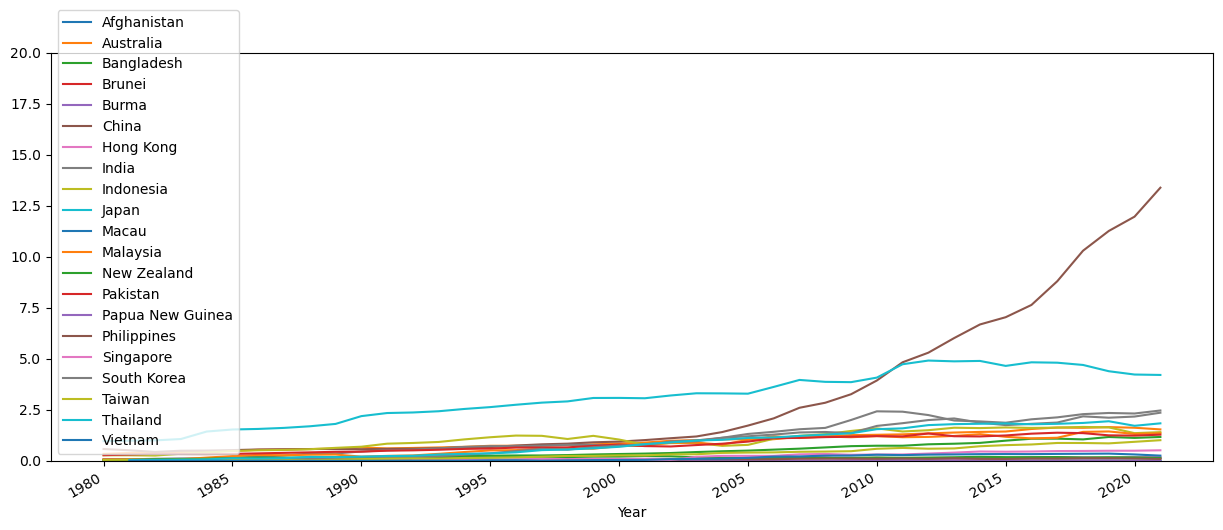

In [140]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Asia & Oceania"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,20))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Asia & Oceania"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,20))
plt.show()

Taiwan NeturalGas energy production was high and showed slight change over the year. China picked up in 2003 and became country with highest NeturalGas energy production and consumption.

### Europe Analysis

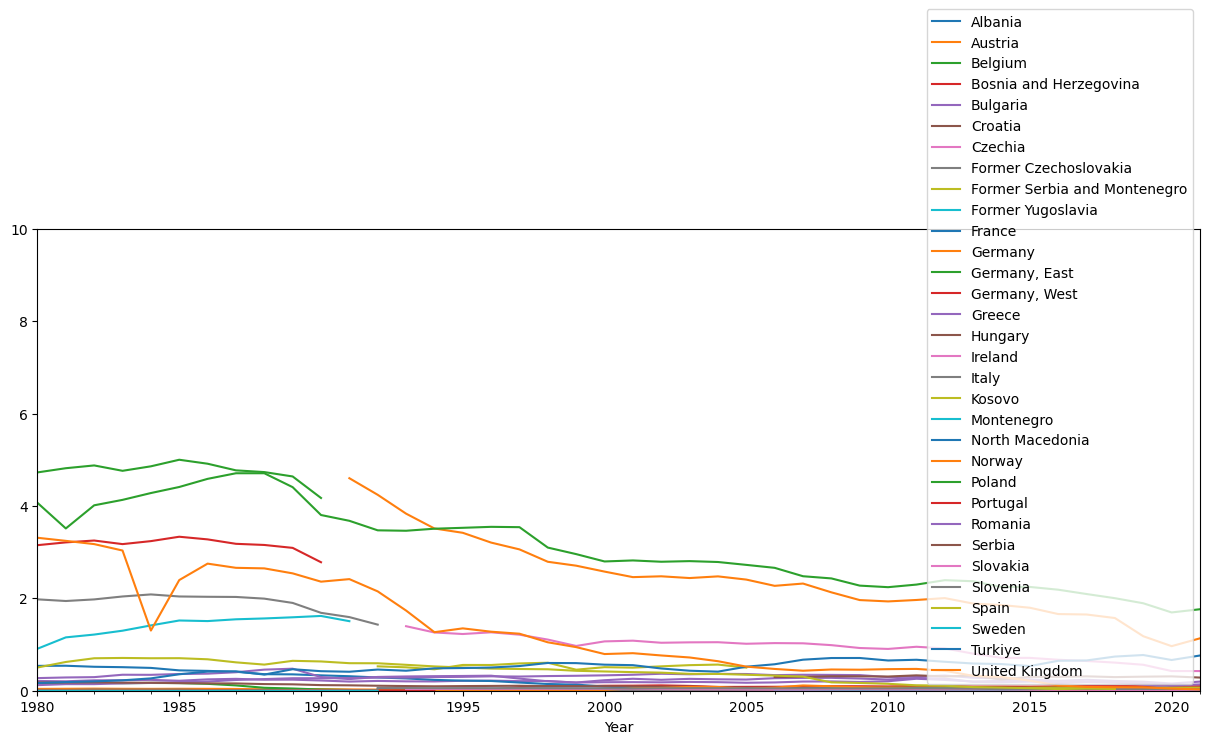

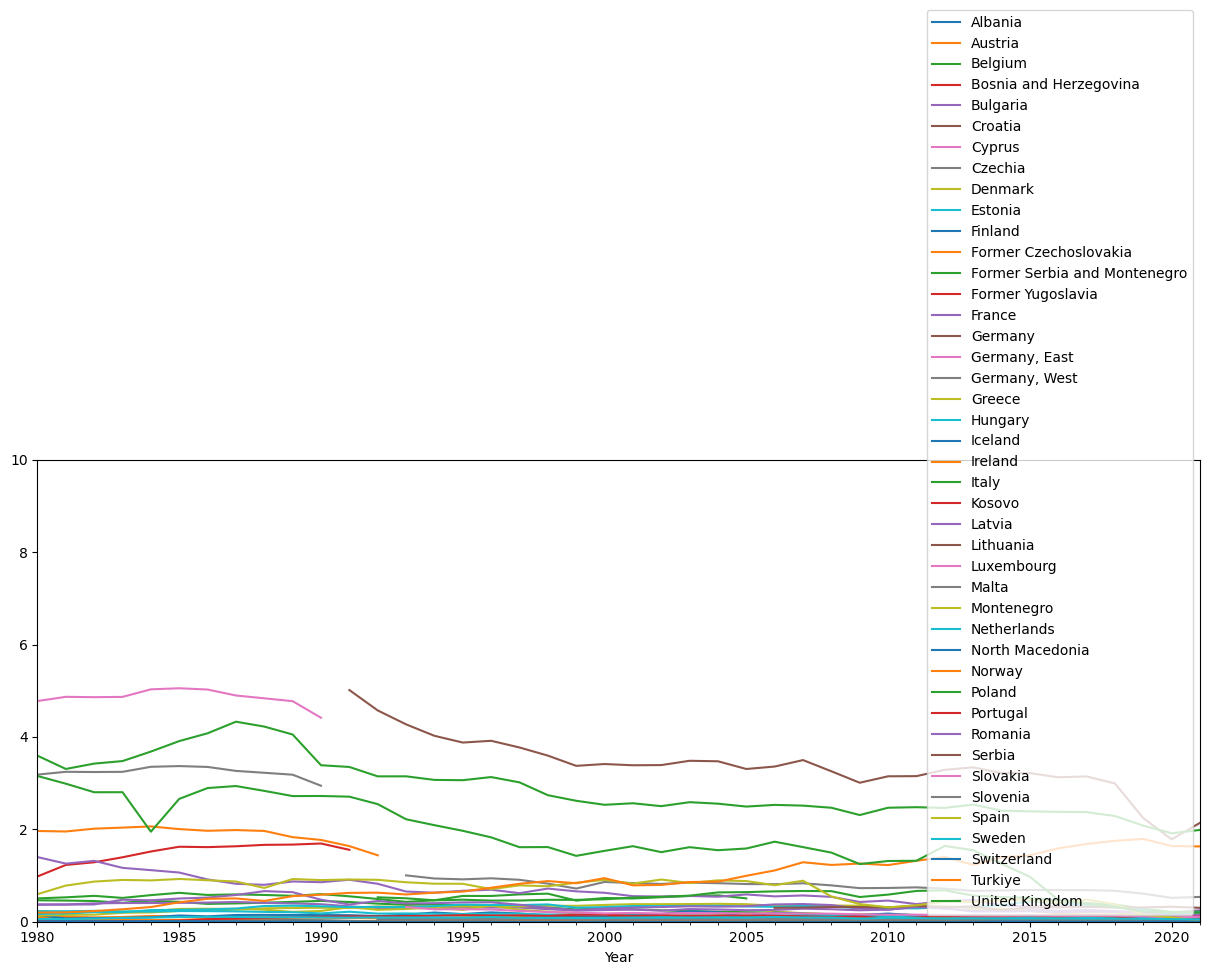

In [142]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Europe"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Europe"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

There is missing data between 1990 to 1995 for both production and counsumption. Overall trend for coal energy production and consumption decreasing over the years. Germany is highest coal energy production and consumption country.


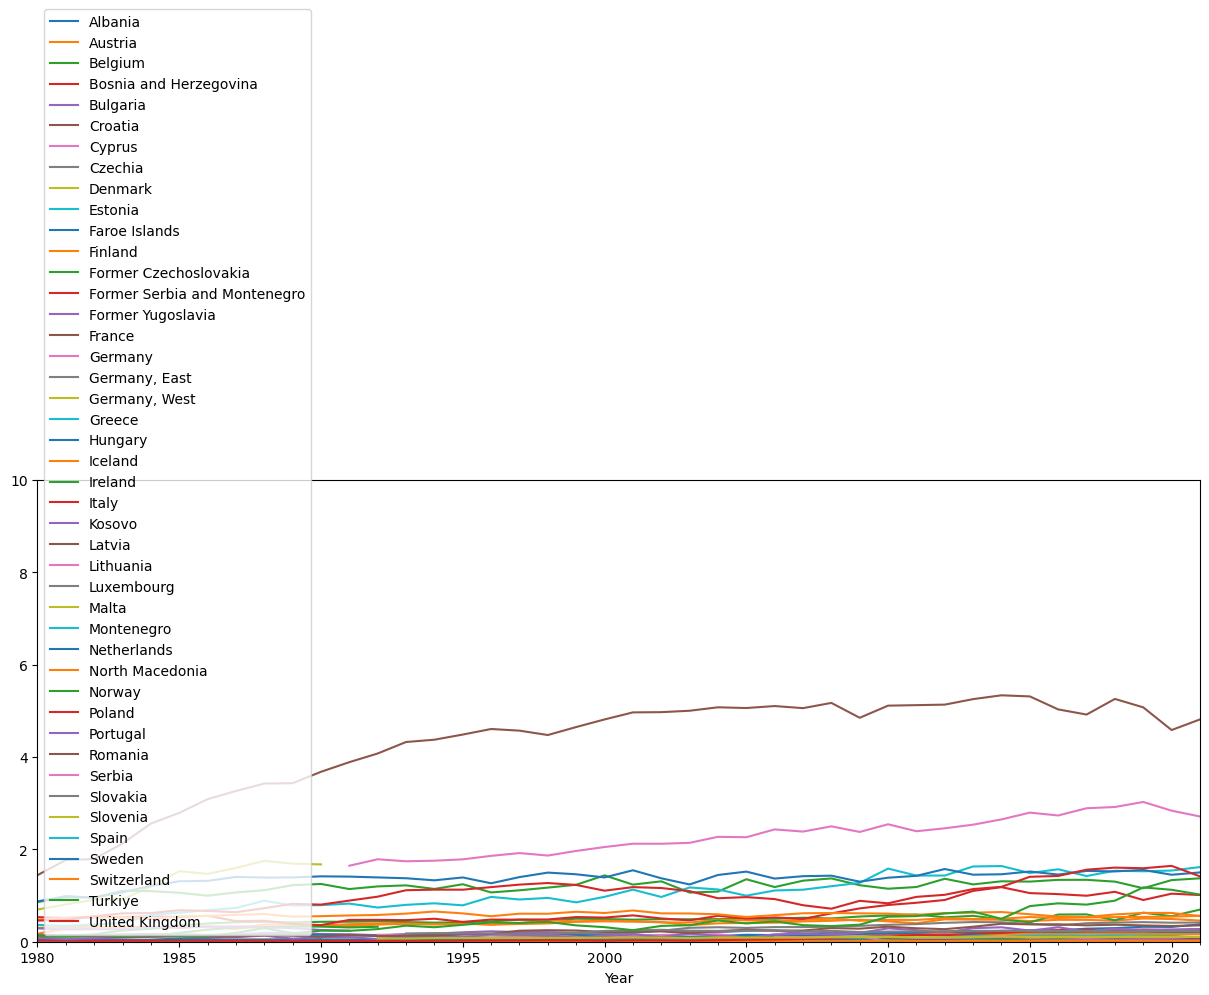

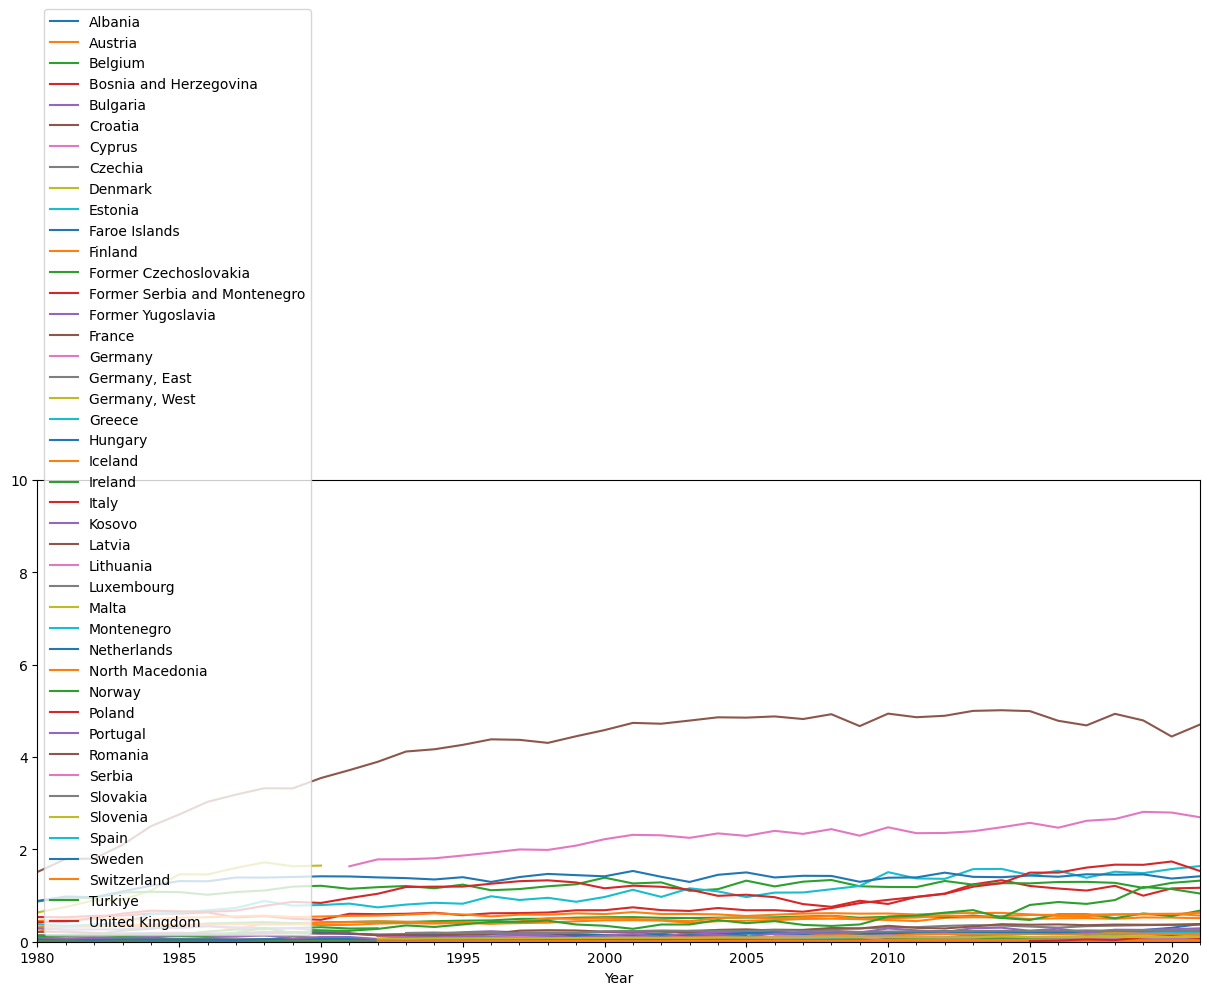

In [143]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Europe"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Europe"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

There is missing data between 1990 to 1995 for both production and counsumption. Overall trend for Nuclear energy production and consumption increasing over the years. France is highest coal energy production and consumption country.

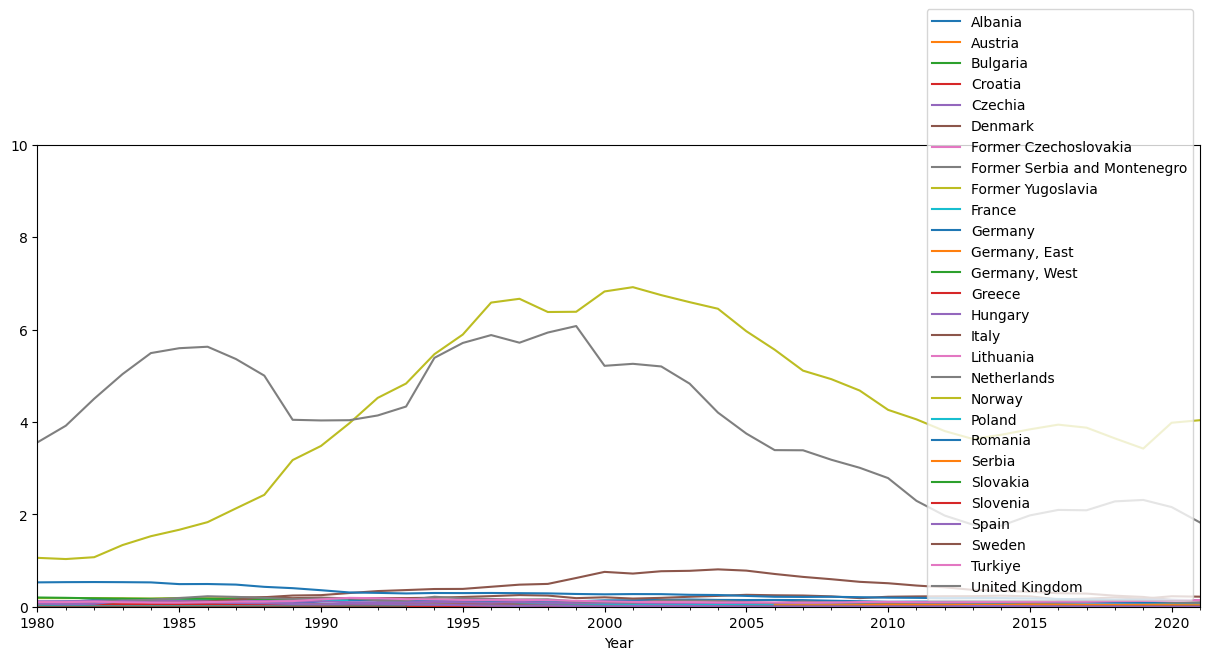

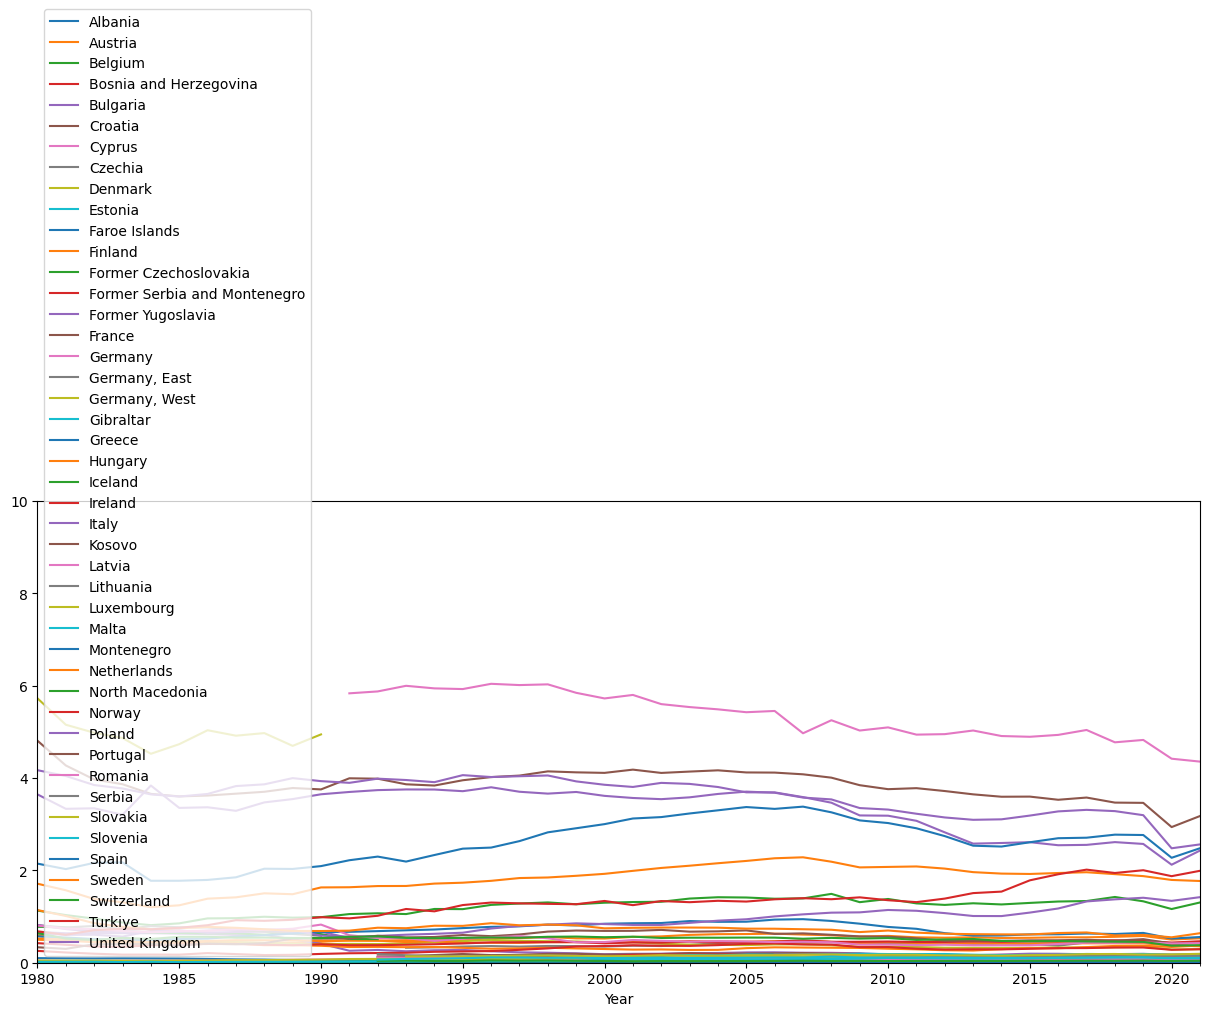

In [144]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Europe"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Europe"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

Petrolium energy production and consumption trend started decreasing from 2010. Norway is highest petroleum energy production country and Germany is highest consumption country.

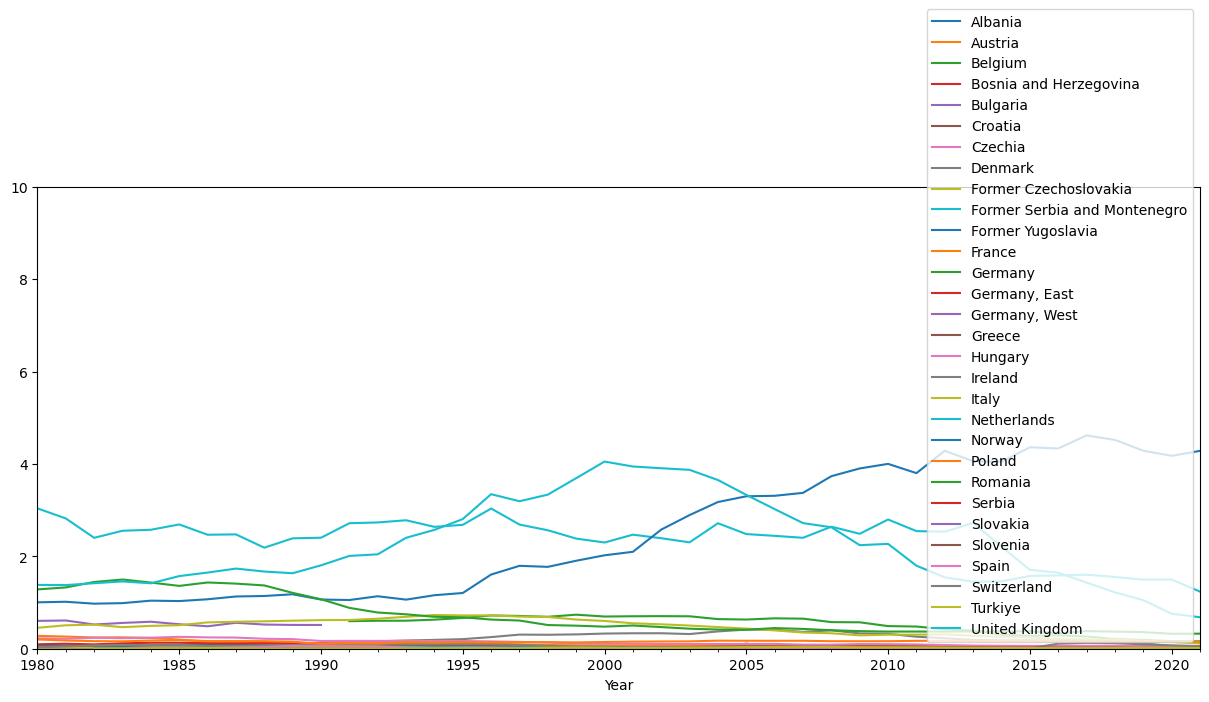

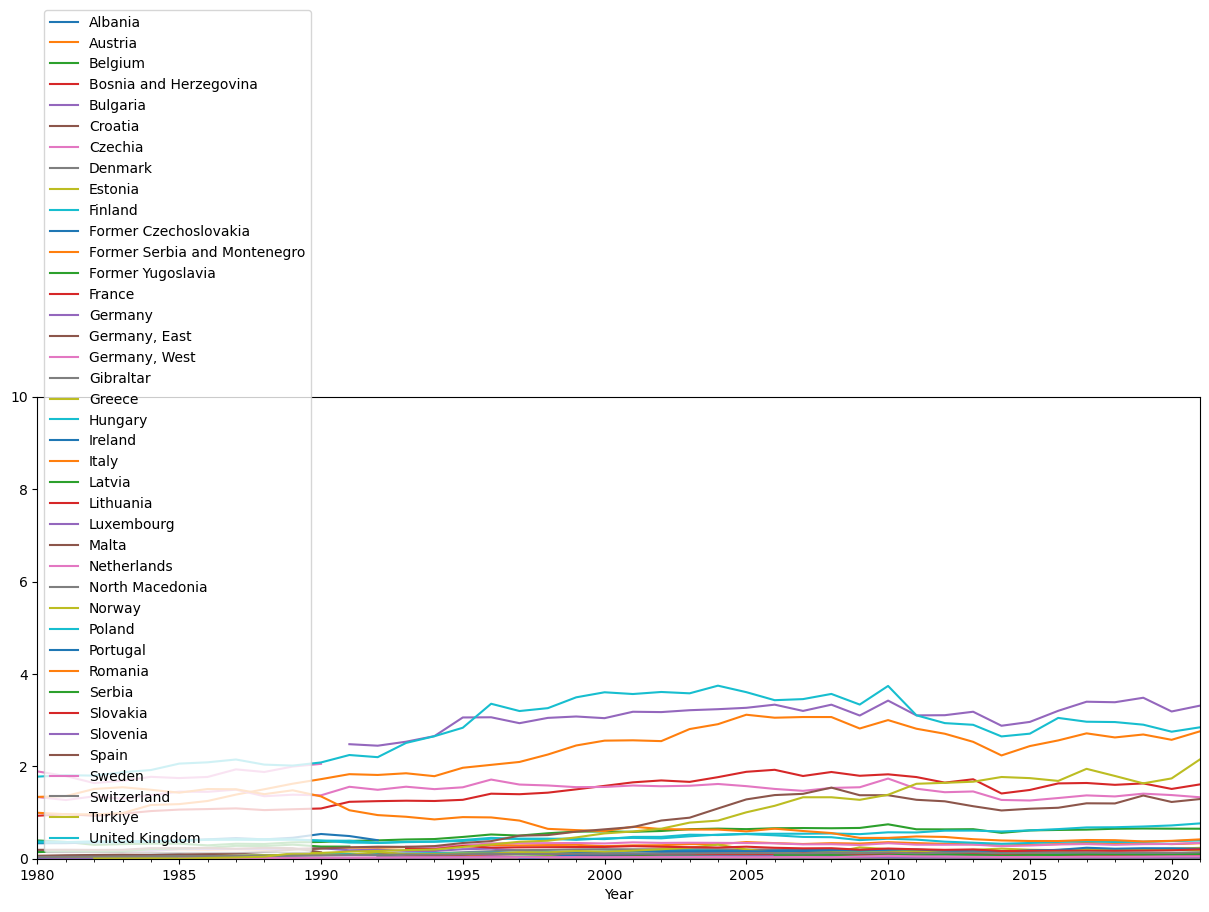

In [145]:
conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Europe"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Europe"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

NaturalGas energy production and consumption trends increasing and stays same from 2000 with slight fluctuation. Albania is highest production and consumption country.

### Central & South America analysis

Coal Energy:


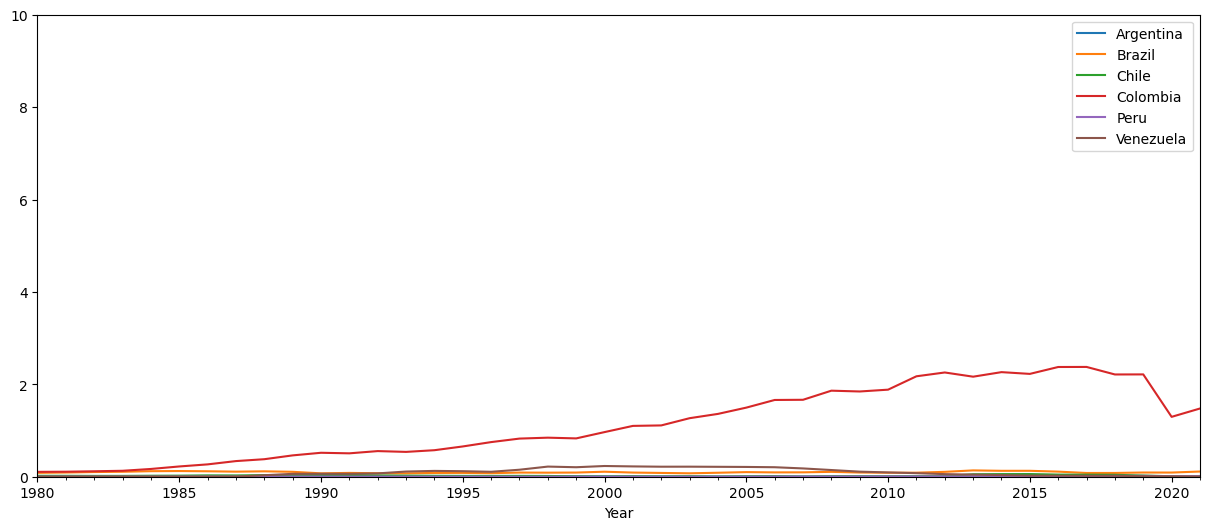

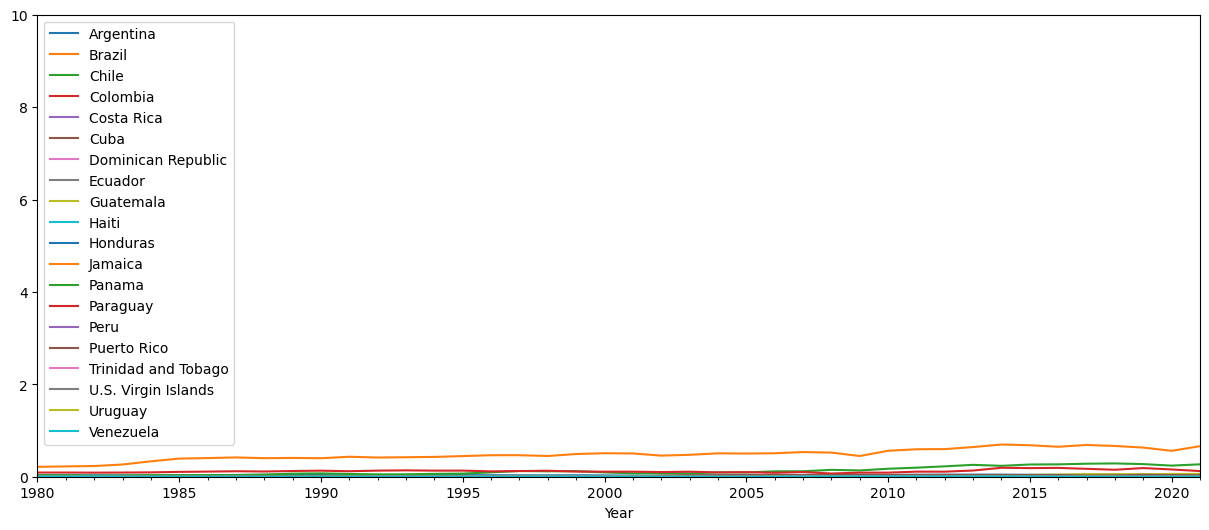

Nulear Energy:


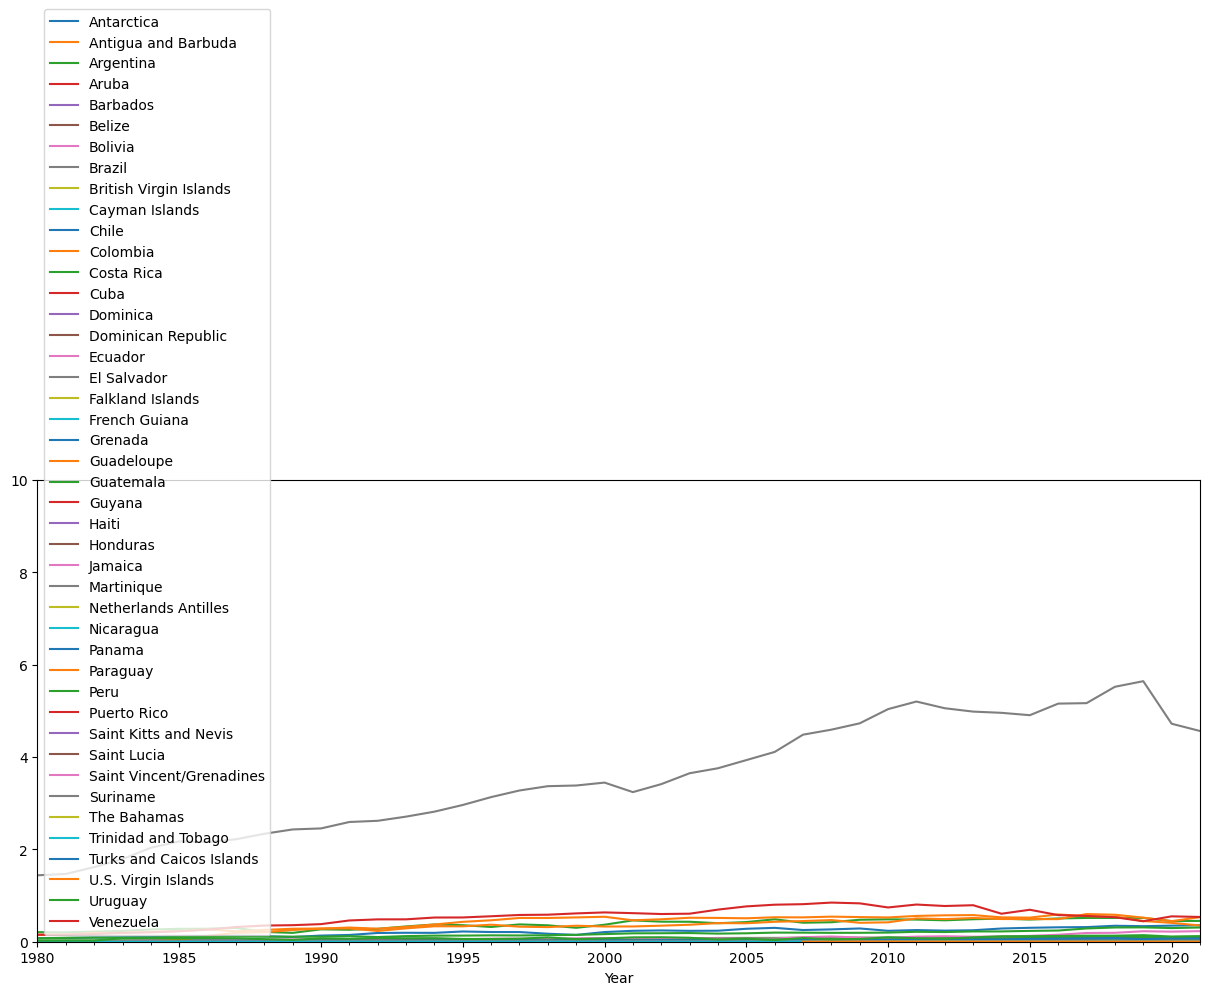

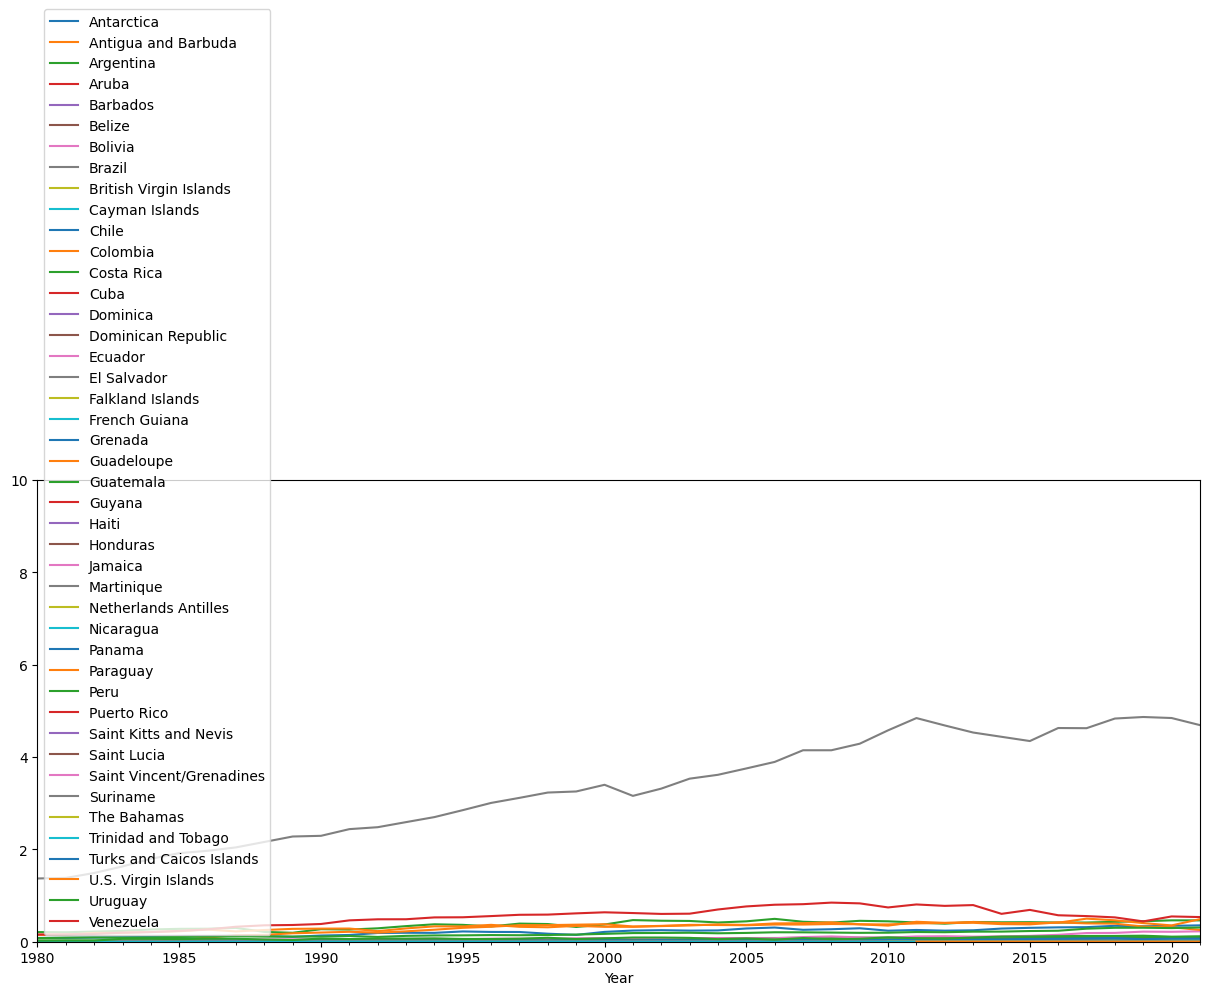

Petrolium Energy:


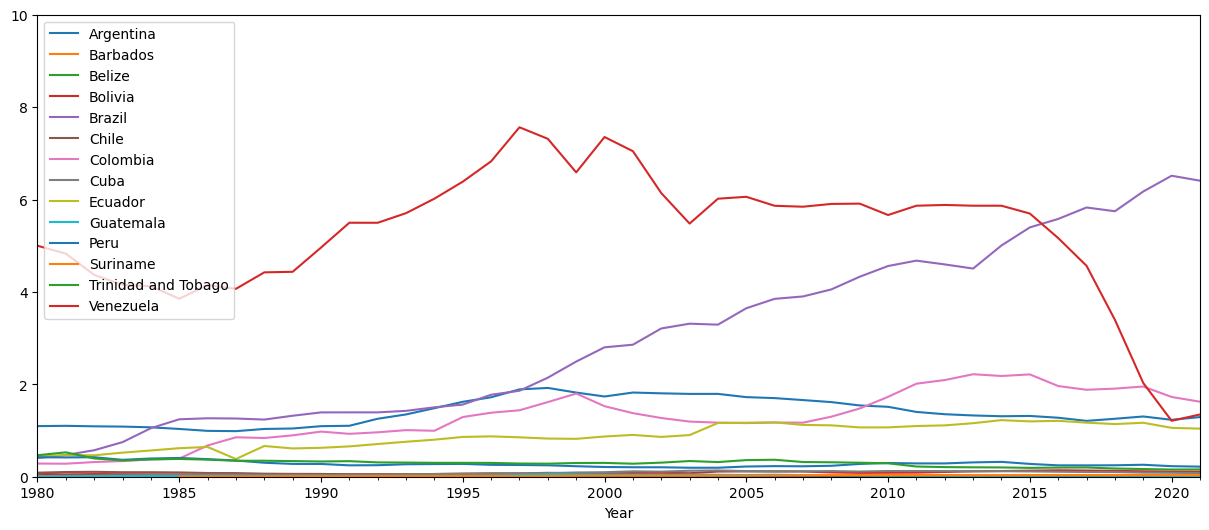

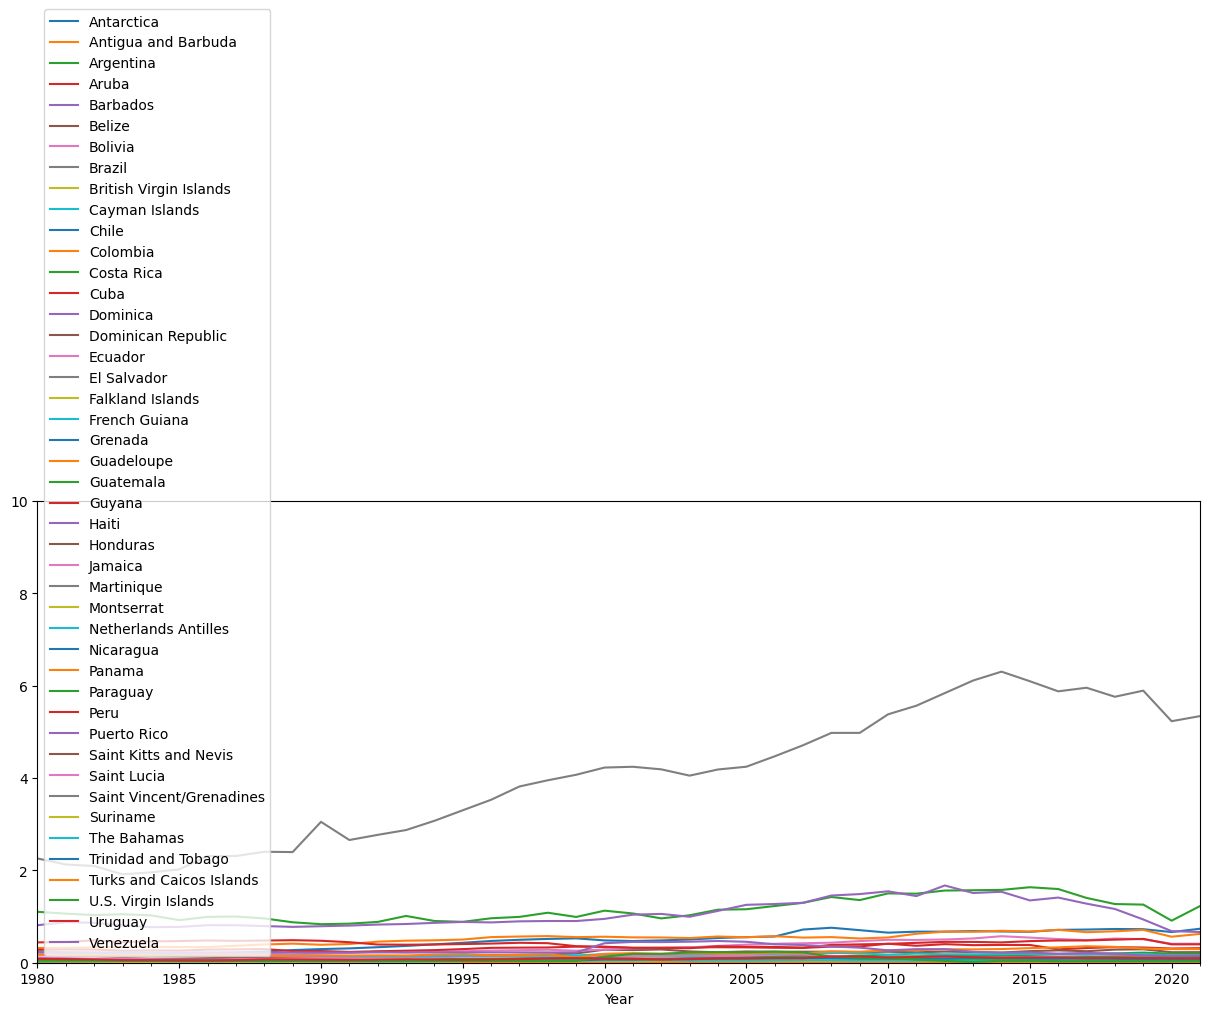

NaturalGas Energy:


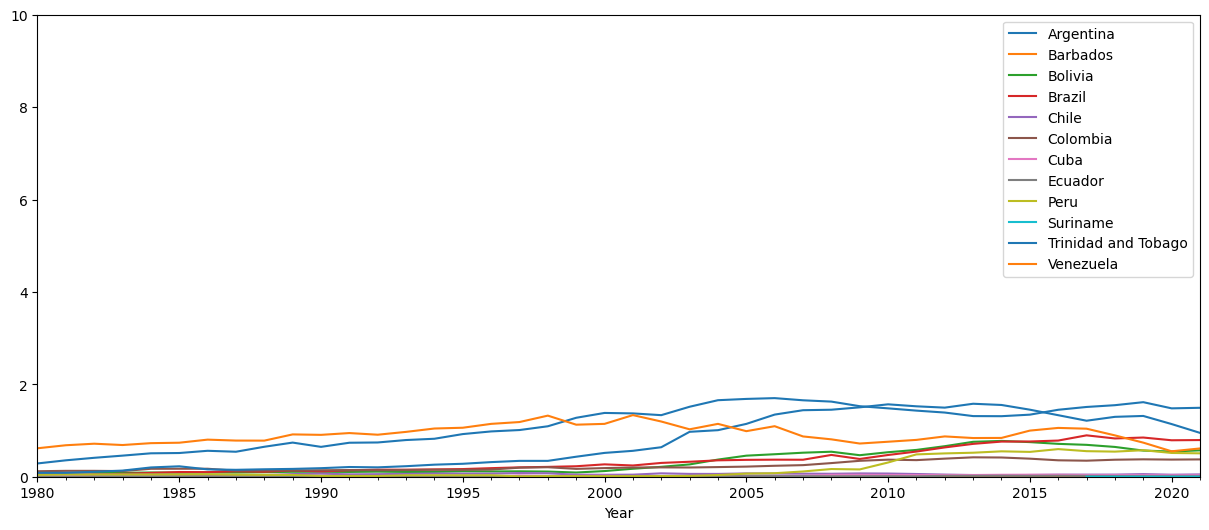

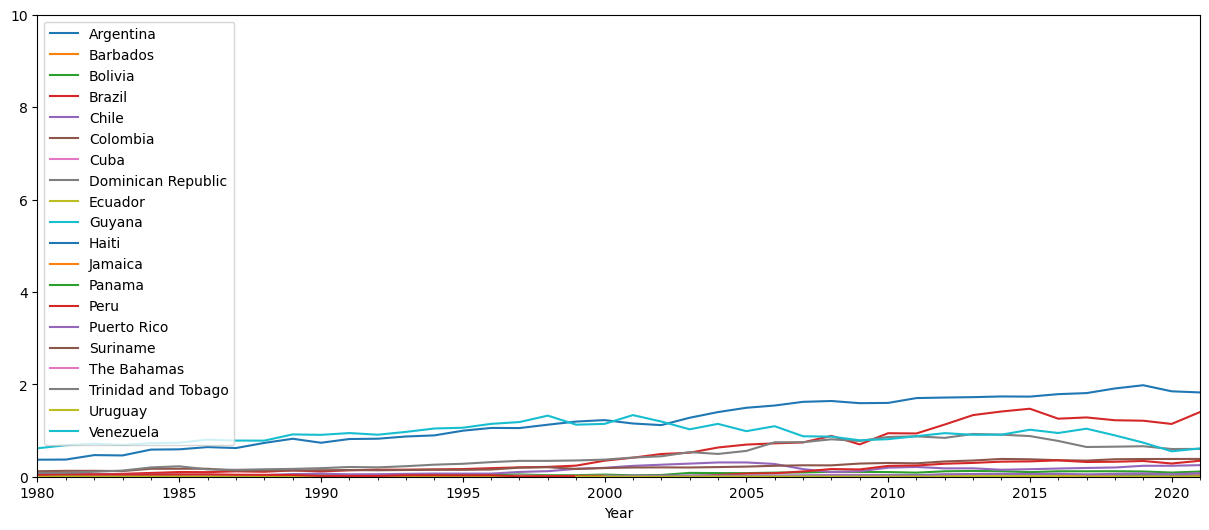

In [153]:
print("Coal Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Central & South America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Central & South America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("Nulear Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Central & South America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Central & South America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("Petrolium Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Central & South America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Central & South America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("NaturalGas Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Central & South America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Central & South America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

### Middle East analysis

Coal Energy:


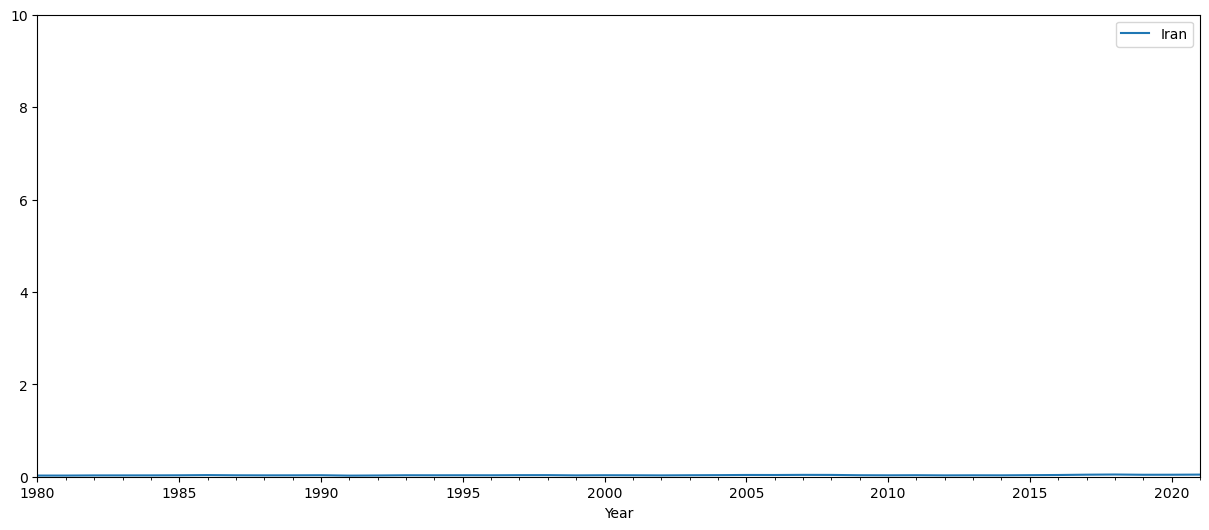

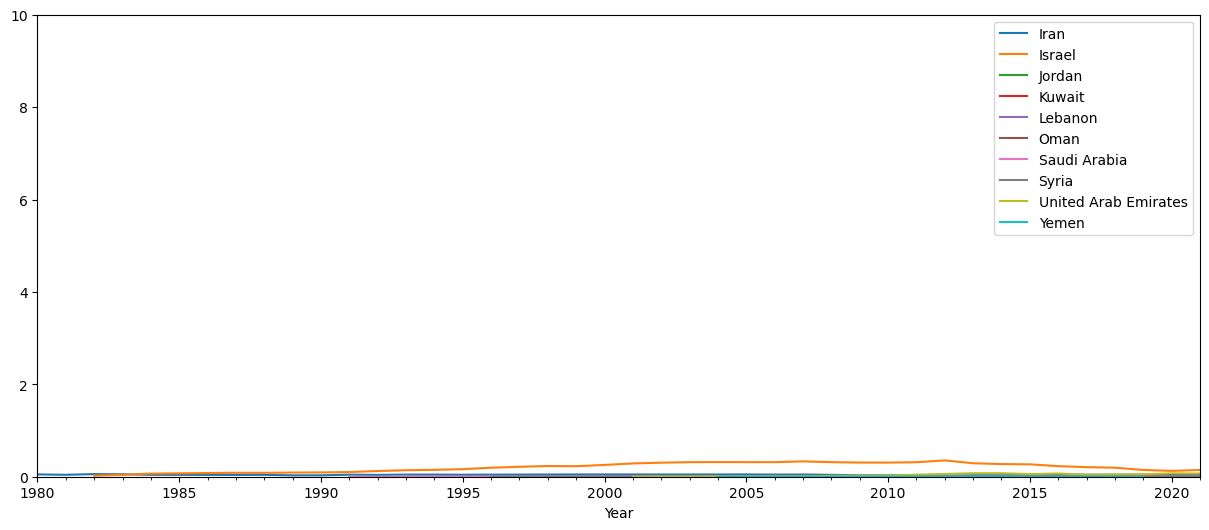

Nulear Energy:


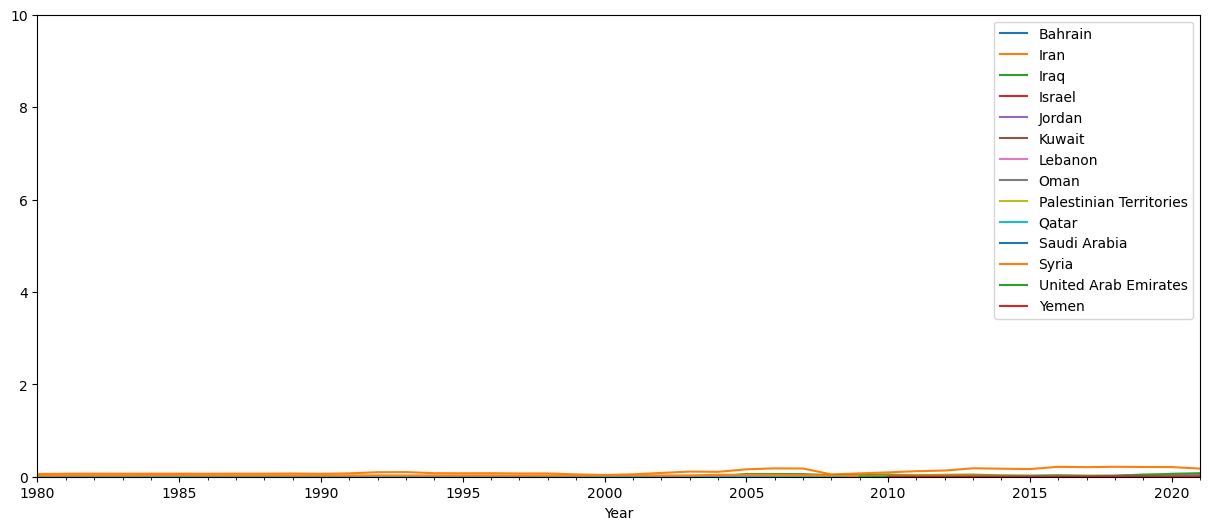

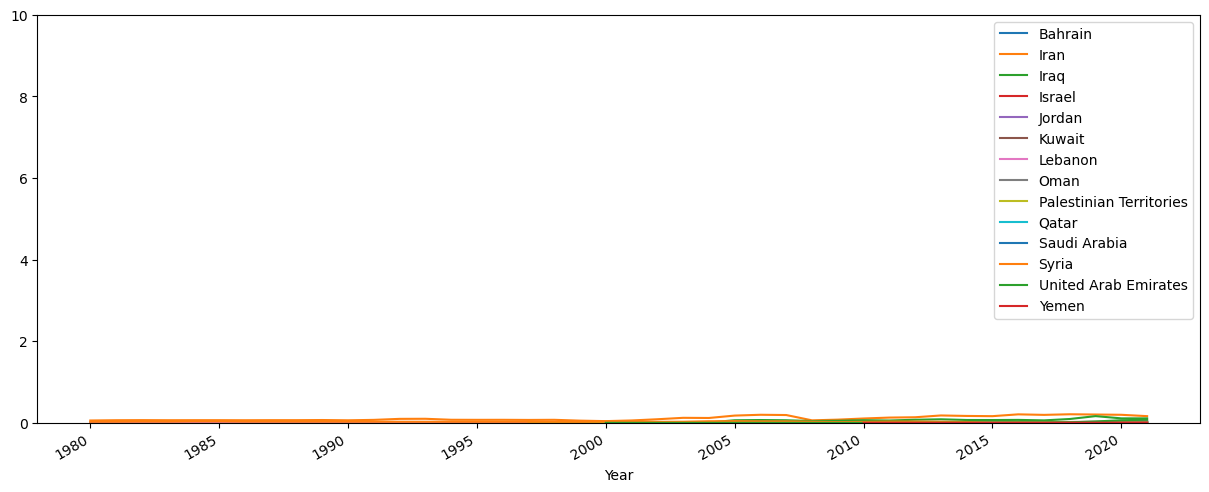

Petrolium Energy:


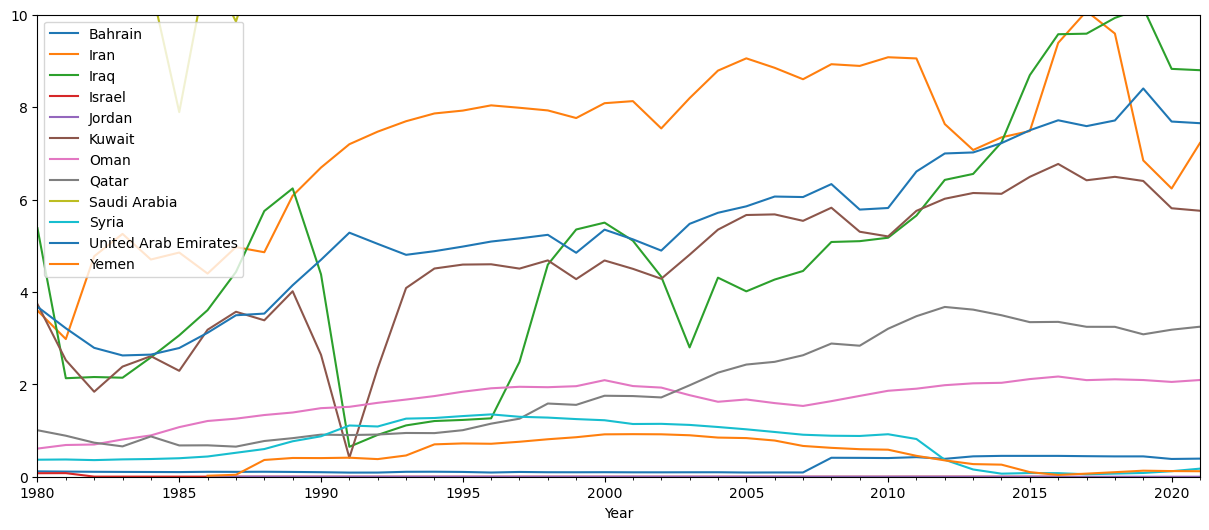

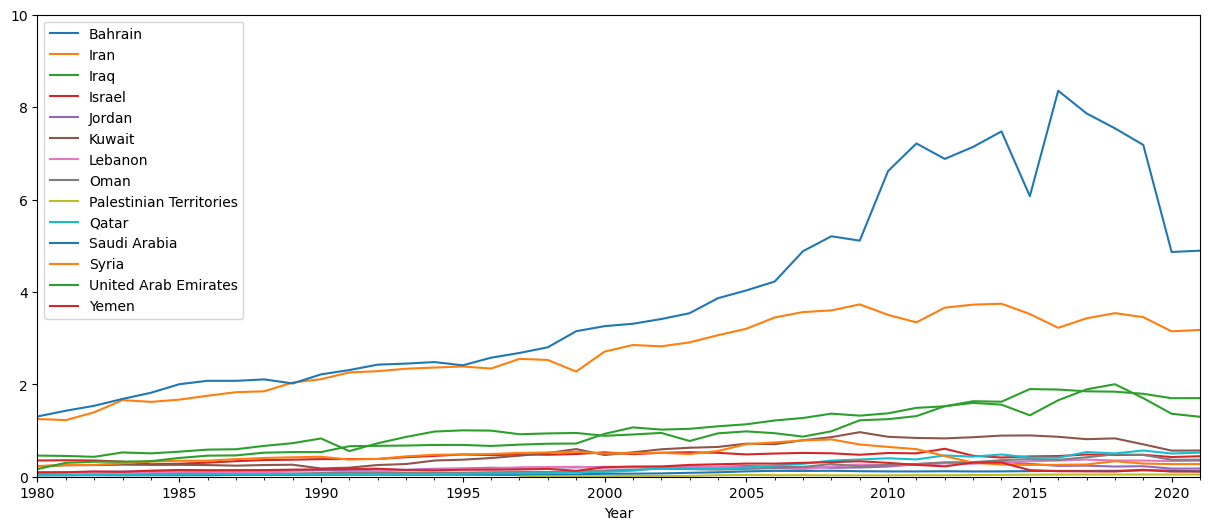

NaturalGas Energy:


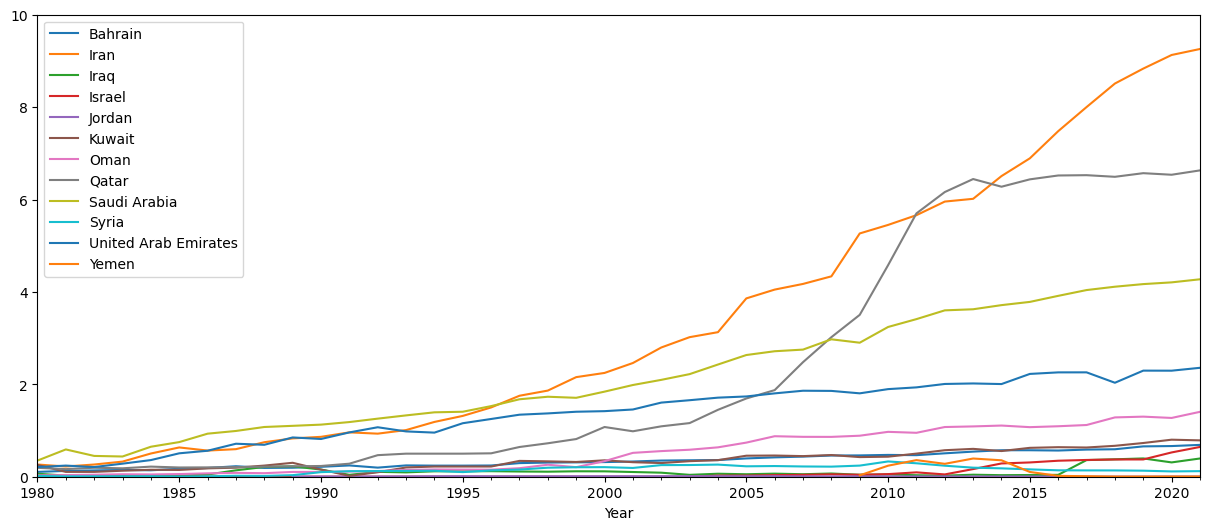

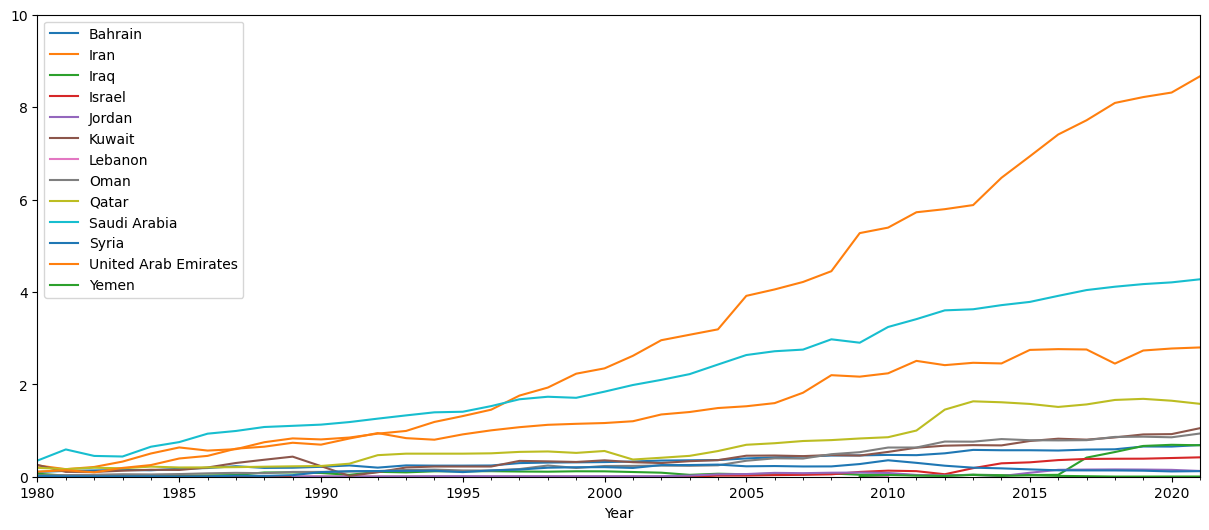

In [154]:
print("Coal Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Middle East"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Middle East"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("Nulear Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Middle East"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Middle East"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("Petrolium Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Middle East"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Middle East"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("NaturalGas Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Middle East"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Middle East"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

### Eurasia analysis

Coal Energy:


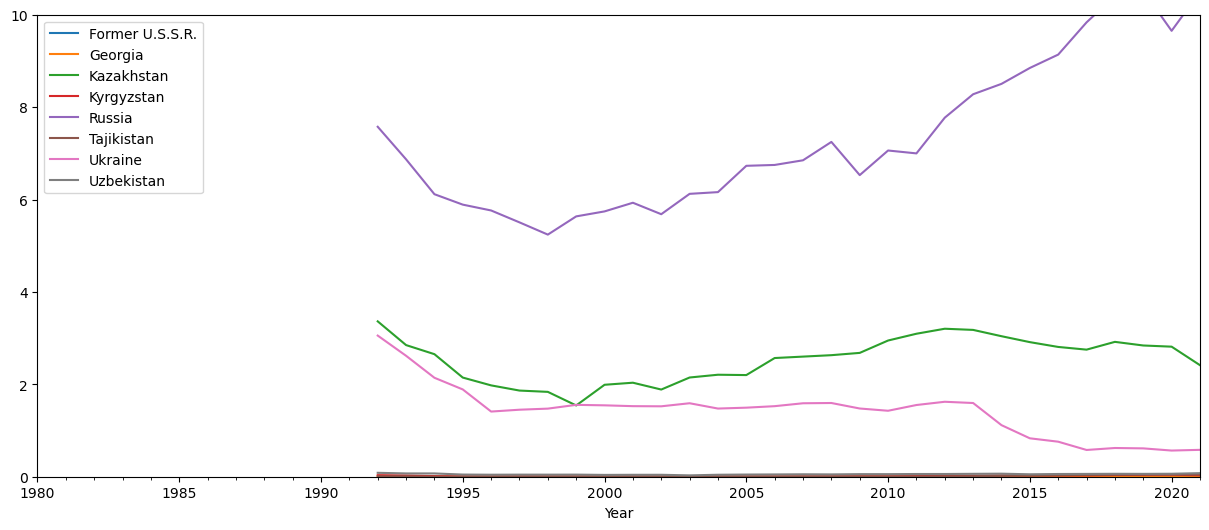

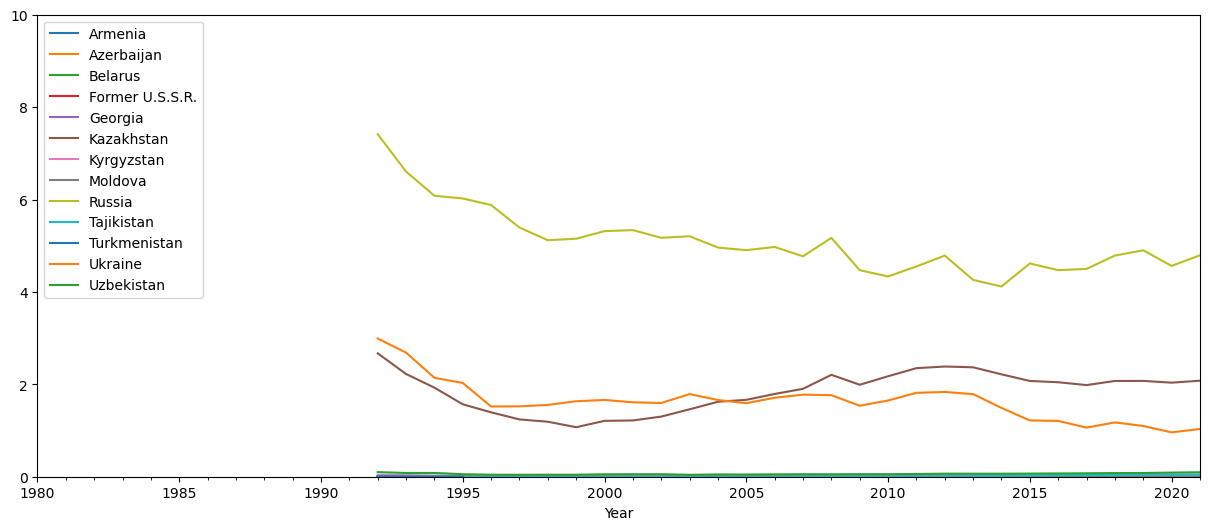

Nulear Energy:


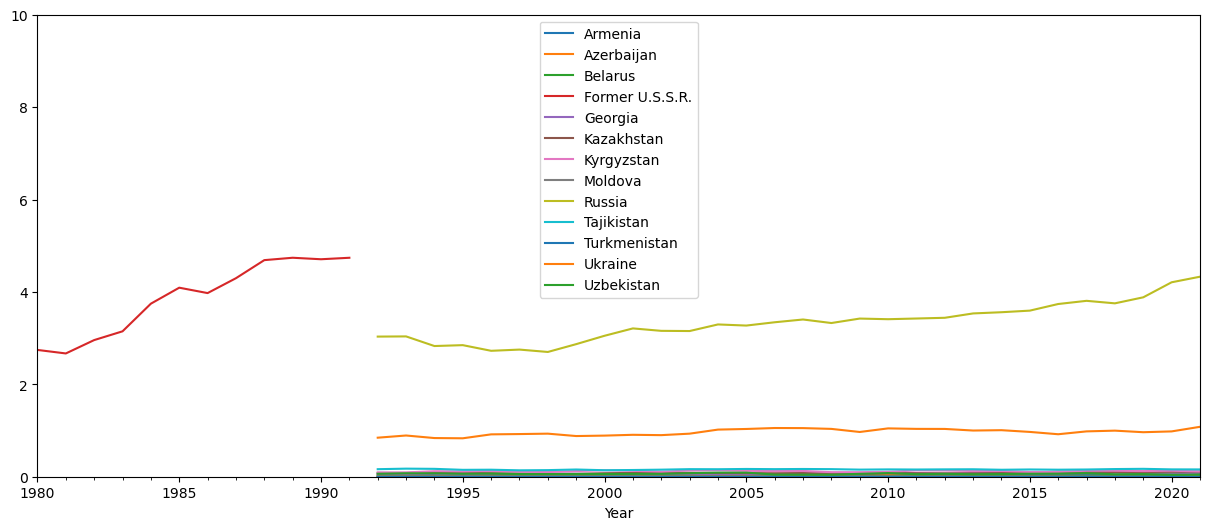

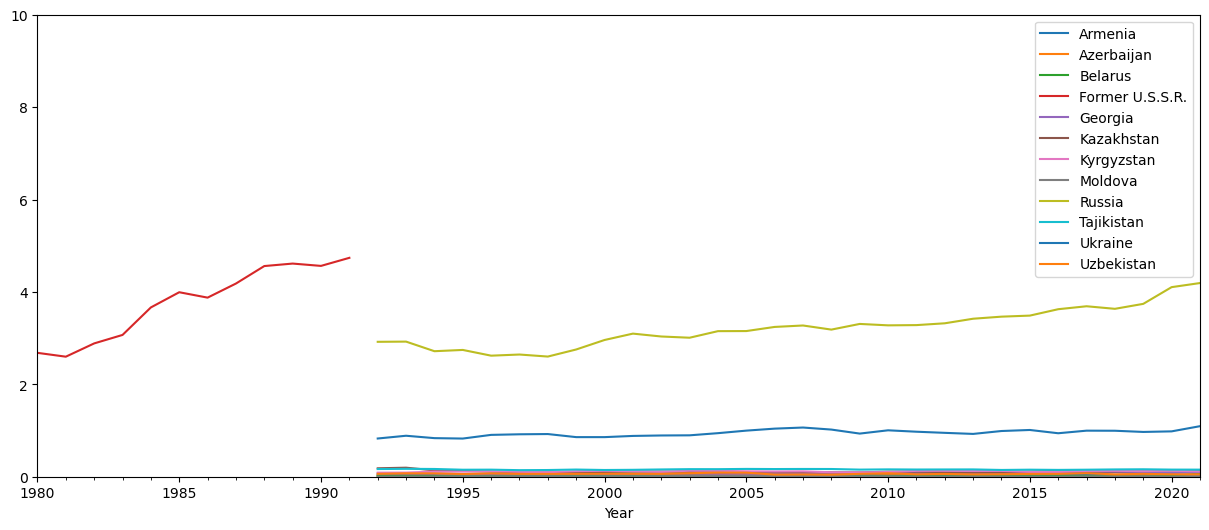

Petrolium Energy:


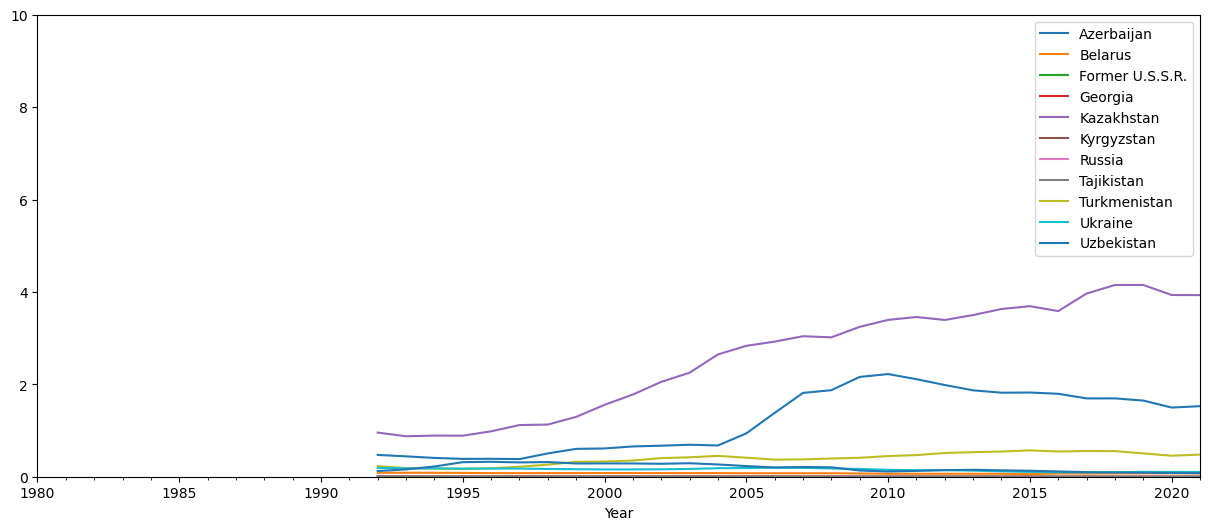

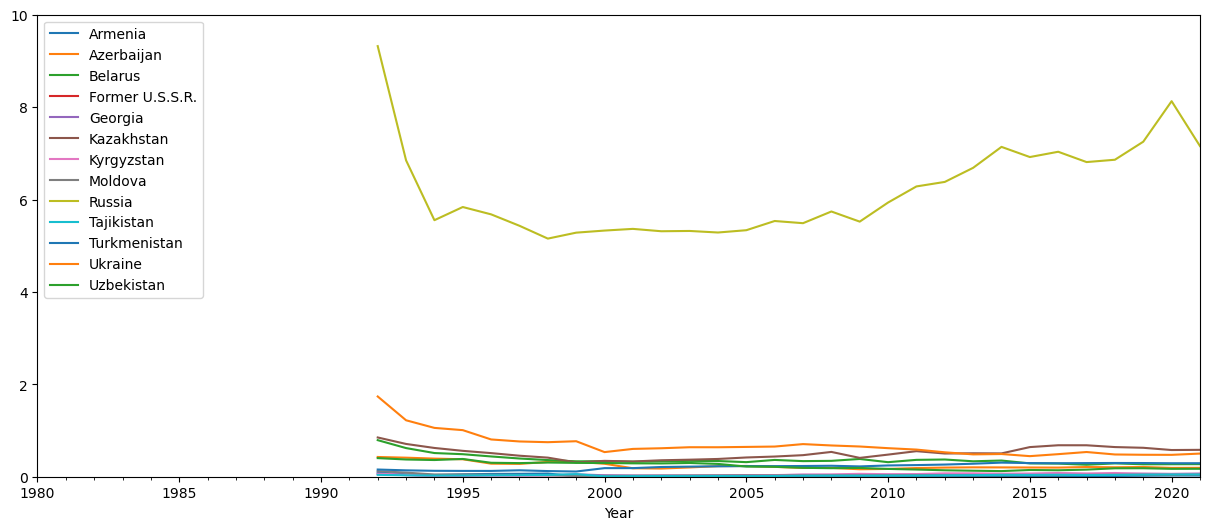

NaturalGas Energy:


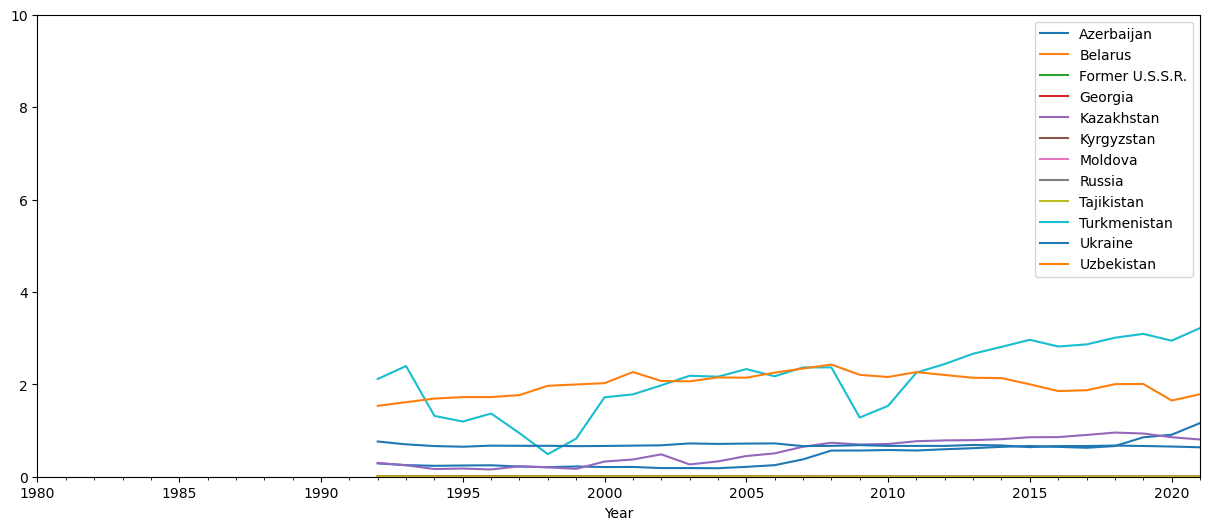

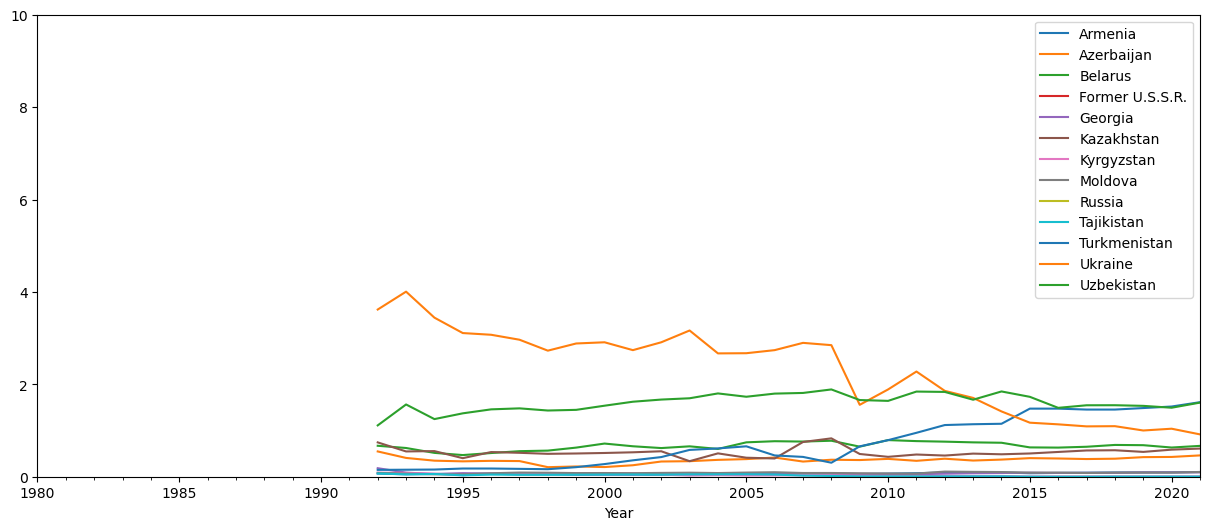

In [155]:
print("Coal Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Eurasia"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "Eurasia"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("Nulear Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Eurasia"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "Eurasia"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("Petrolium Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Eurasia"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "Eurasia"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("NaturalGas Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Eurasia"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "Eurasia"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

### North America analysis

Coal Energy:


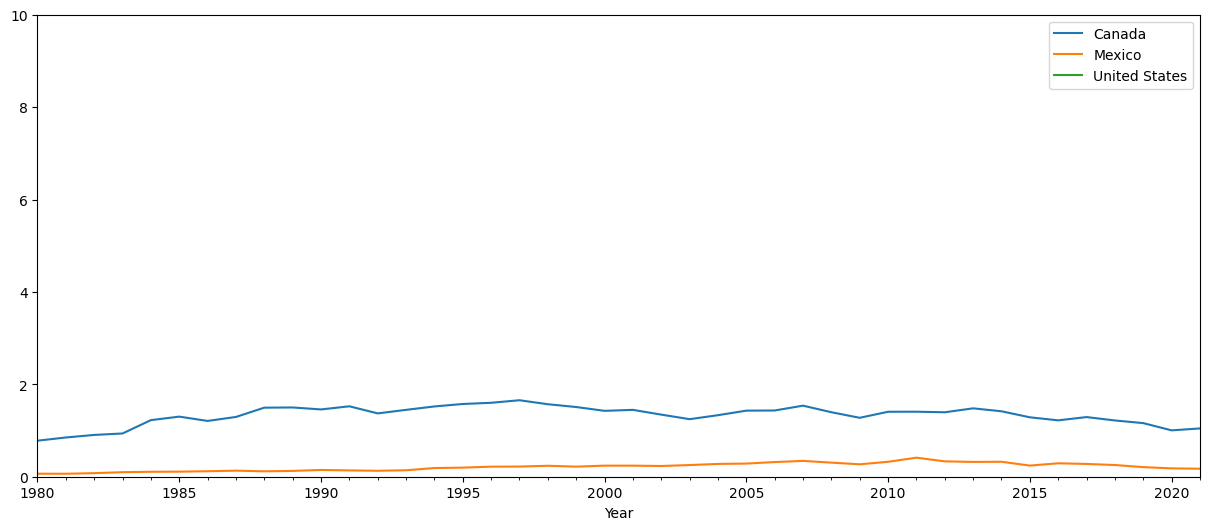

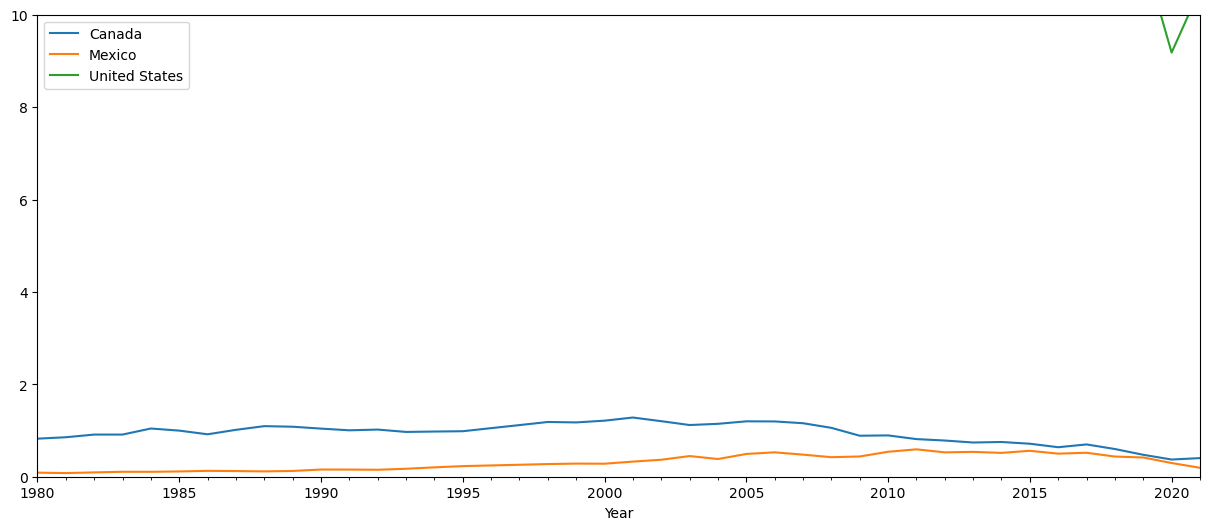

Nulear Energy:


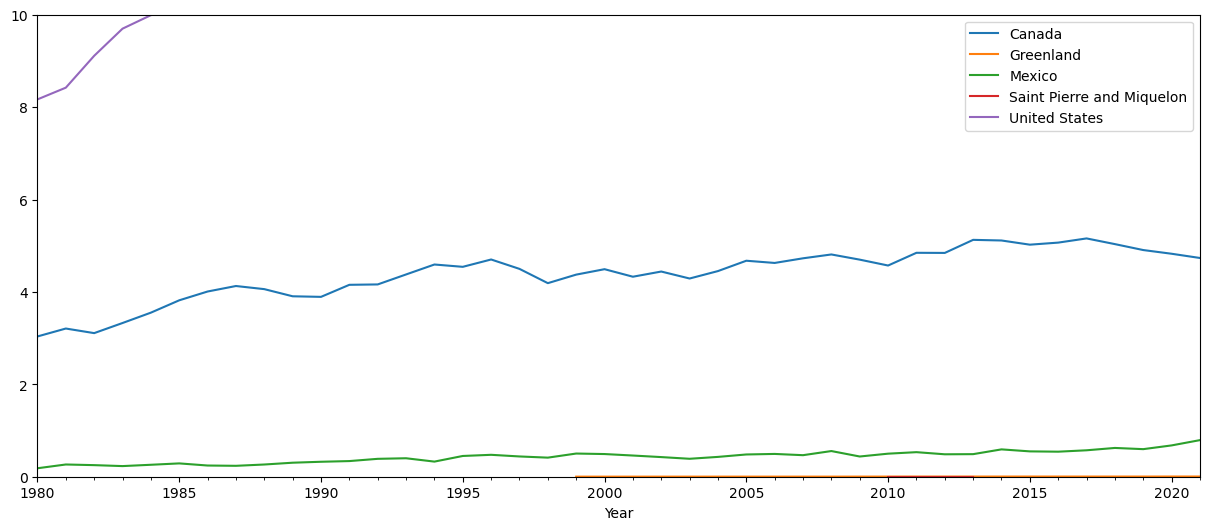

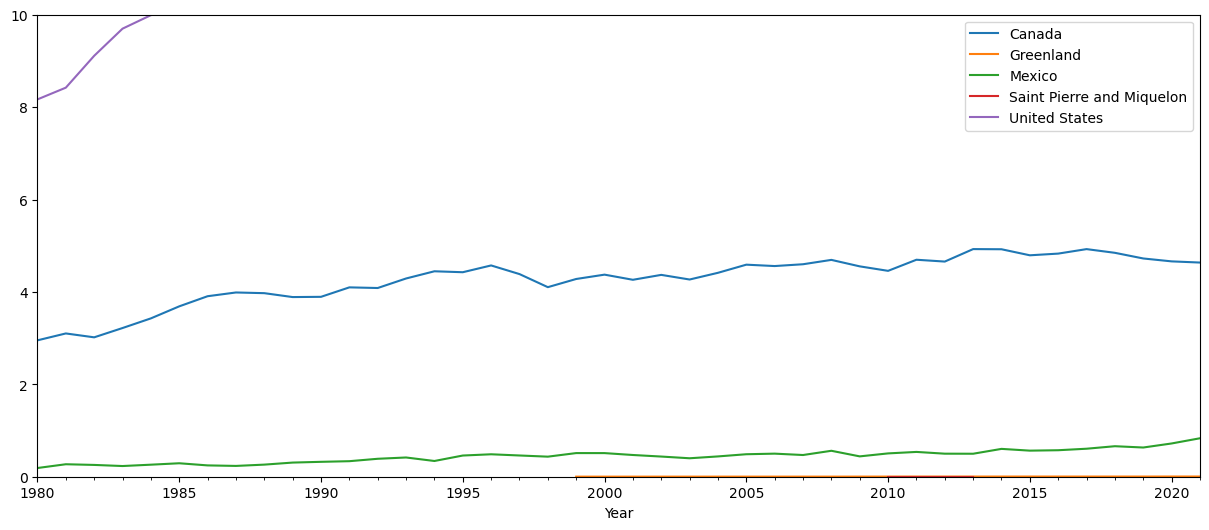

Petrolium Energy:


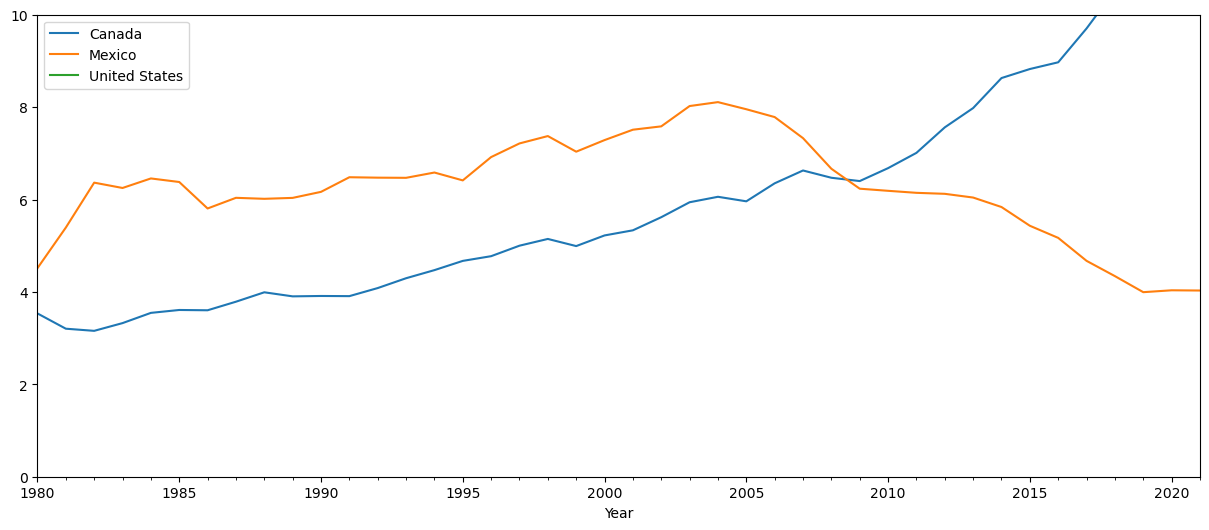

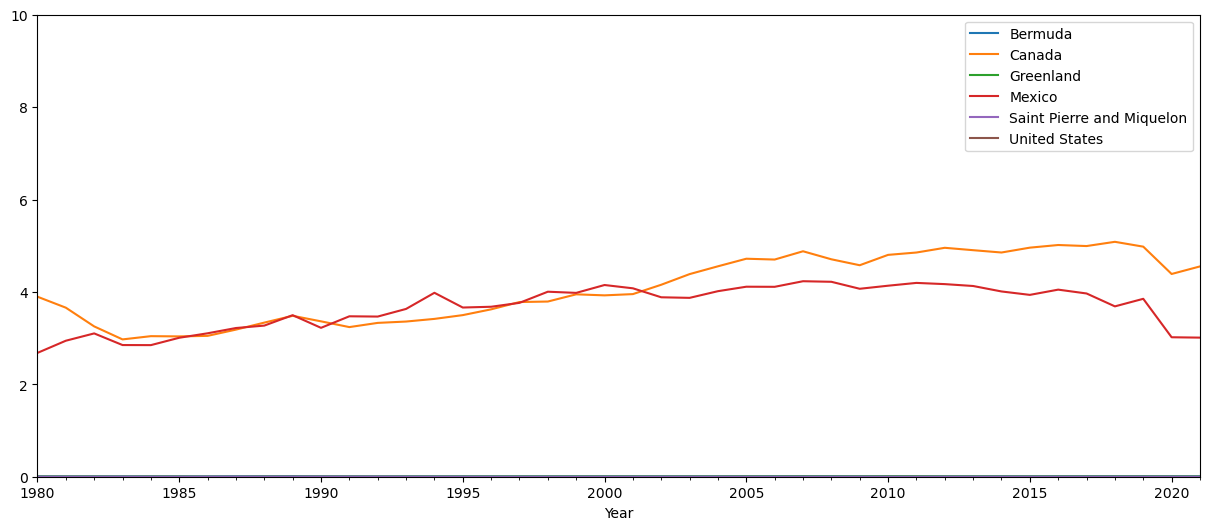

NaturalGas Energy:


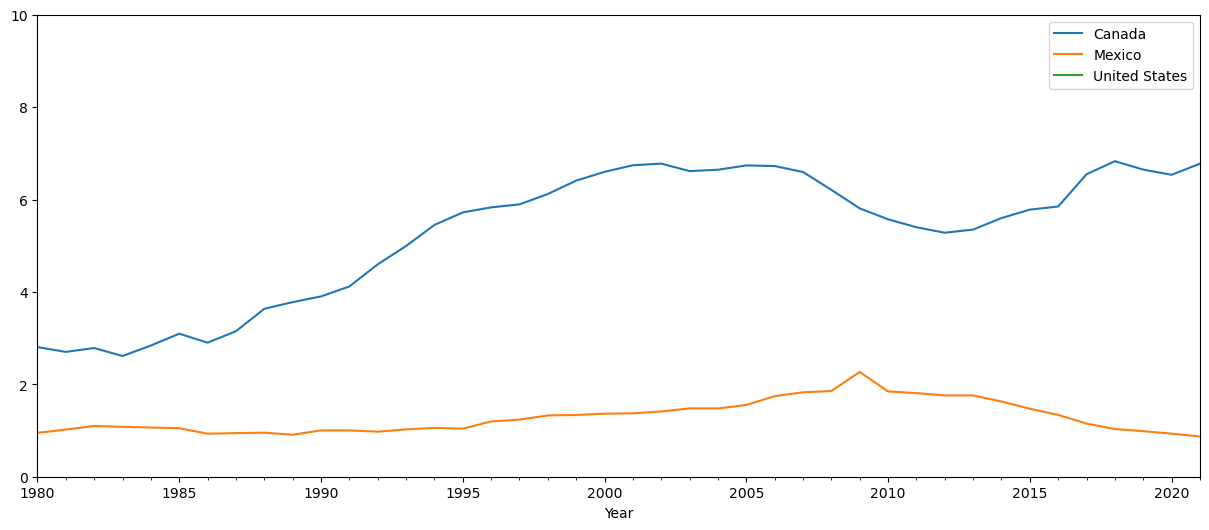

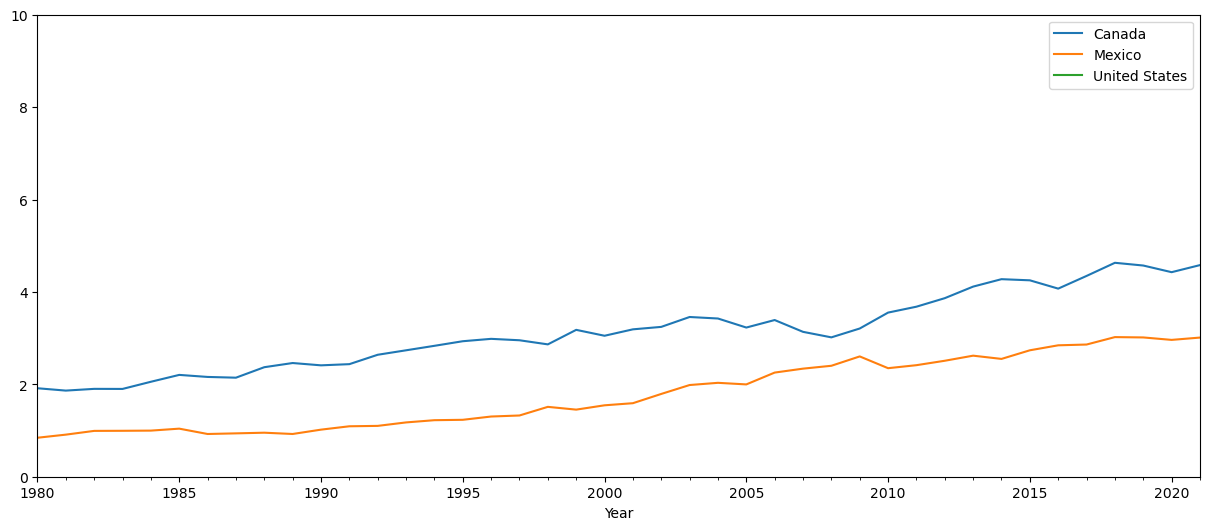

In [156]:
print("Coal Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "North America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Coal"),
    (energy_df['Continent'] == "North America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("Nulear Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "North America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Nuclear"),
    (energy_df['Continent'] == "North America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("Petrolium Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "North America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "Petrolium"),
    (energy_df['Continent'] == "North America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

print("NaturalGas Energy:")

conditions = [
    (energy_df['Usage'] == "Production"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "North America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()

conditions = [
    (energy_df['Usage'] == "Consumption"),  
    (energy_df['Source'] == "NaturalGas"),
    (energy_df['Continent'] == "North America"),
    (energy_df['Energy'] > 0)
]

energy_df[conditions[0] & conditions[1] & conditions[2] & conditions[3]].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,10))
plt.show()